<i><b><u>Note</u>:</b> Please use the "Outline" function to view the code notebook's structure and to navigate easier.</i>
# <b> Time Series Analysis and Forecast Sales of Trucks </b>

## Introduction and Motivation
<p>
Time series analysis allows businesses to predict future sales by revealing patterns in historical data. With 12 years of detailed monthly data of truck sales, applying this analysis will not only help in understanding the sales patterns but also in making data-driven decisions to optimize sales and improve planning.

<p>
This notebook present an end-to-end time series analysis and forecast on sales of trucks from a dataset obtained from Kaggle: <a href="https://www.kaggle.com/datasets/ddosad/dummy-truck-sales-for-time-series">link here</a>
</p>

## Outline
<p>We cover the following steps:</p>
<ul>
    <li>1. Project purposes</li>
    <li>2. Overview about dataset</li>
    <li>3. Time series analysis
        <ul>
            <li>3.1. Handling missing values</li>
            <li>3.2. Looking at outliers</li>
            <li>3.3. Identifying patterns and decomposition (Identifying trend, seasonality, residual)</li>
            <li>3.4. Stationarity check and Preliminary visualizations (ACF, PACF)</li>
            <li>3.5. Split data into training and testing</li>
        </ul>
    </li>
    <li>4. Data modeling</li>
        <ul>
            <li>4.1. ARIMA</li>
            <li>4.2. SARIMA</li>
            <li>4.3. Facebook Prophet</li>
            <li>4.4. Auto ARIMA</li>
            <li>4.5. Auto SARIMA</li>
        </ul>
    <li>5. Compare models' performance</li>
    <li>6. Evaluate model performance with Time Series Cross Validation</li>
</ul>

## Project Purposes

<p>The purposes of this projects are:</p>
<ul>
    <li>Time series analysis to identify patterns like trend, seasonality, residuals </li>
    <li>Build time series models to predict sales of trucks for <b>the last 12 months</b></li>
</ul>

## Overview about dataset

<p>The dataset has 144 rows which contain information on monthly number of products sold from 2003 to 2014. Each row represents the number of trucks sold in each month. The dataset is obtained from Kaggle via <a href="https://www.kaggle.com/datasets/ddosad/dummy-truck-sales-for-time-series">this link</a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
from sklearn.model_selection import TimeSeriesSplit

c:\Users\LENOVO\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df=pd.read_csv("./Data Truck Sales/Truck_sales.csv")

In [3]:
df

,Month-Year,Number_Trucks_Sold
0,03-Jan,155
1,03-Feb,173
2,03-Mar,204
3,03-Apr,219
4,03-May,223
...,...,...
139,14-Aug,933
140,14-Sep,704
141,14-Oct,639
142,14-Nov,571


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Month-Year          144 non-null    object
 1   Number_Trucks_Sold  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [5]:
df.describe()

,Number_Trucks_Sold
count,144.000000
mean,428.729167
std,188.633037
min,152.000000
25%,273.500000
50%,406.000000
75%,560.250000
max,958.000000


## Time series analysis


In [6]:
df.columns=["month","number_sold"]

In [7]:
df['month'] = df['month'].apply(lambda x: pd.to_datetime('20' + x, format='20%y-%b'))

In [8]:
df=df.sort_values(by="month",ascending=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   month        144 non-null    datetime64[ns]
 1   number_sold  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [10]:
df

,month,number_sold
0,2003-01-01,155
1,2003-02-01,173
2,2003-03-01,204
3,2003-04-01,219
4,2003-05-01,223
...,...,...
139,2014-08-01,933
140,2014-09-01,704
141,2014-10-01,639
142,2014-11-01,571


In [11]:
fig=px.line(df,x="month",y="number_sold", template="simple_white", title="number_sold line chart")
fig.show()

c:\Users\LENOVO\AppData\Local\Programs\Python\Python39\lib\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


### Handling missing values

<p>There is no missing value in this dataset.

### Looking at outliers

<p> There is no outliers in this dataset.

In [12]:
fig=px.box(df,y="number_sold",hover_data=df.columns, template="simple_white", title="number_sold boxplot")
fig.update_layout(width=800, height=600)
fig.show()

c:\Users\LENOVO\AppData\Local\Programs\Python\Python39\lib\site-packages\_plotly_utils\basevalidators.py:114: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



### Identifying patterns and decomposition (Identifying trend, seasonality, residual)
<p>The time series is multiplicative because the magnitude of the seasonality component in the  line plot above is dependent of the trend <a href="https://sigmundojr.medium.com/seasonality-in-python-additive-or-multiplicative-model-d4b9cf1f48a7">(reference here)</a>. The line plot above clearly shows there is a seasonality of 12 months (1 year). Decomposition components of the series as below:
<ul>
    <li><p><b>Original</b>: The original data, showing the overall pattern of sales over time. The original time series shows fluctuations that might be influenced by a combination of trend, seasonality, and irregular components.
    <li><p><b>Trend</b>:  The trend component displays a general long-term movement in the data, ignoring short-term fluctuations. The upward slope in the trend graph suggests that there is a general increase in the values over time. This shows higher sales over the years.
    <li><p><b>Seasonality</b>: The seasonality component captures regular patterns that repeat over fixed periods. In the seasonality graph, we can see consistent peaks and drops indicating that there is a repeating pattern within each year. This could correspond to factors like seasonal demand, weather cycles, or other recurring events that affect the data periodically.
    <li><p><b>Residuals</b>: These are the remaining after the trend and seasonality have been removed from the original data. In the residuals plot, we can see that they fluctuate around 1, which could mean that the model used for decomposition has captured most of the systematic information in the data, leaving behind random noise. However, there are periods where the residuals show larger deviations from 1, indicating possible short-term anomalies, outlying events, or other unexplained variations in the time series.

In [1]:
#Set column "month" as index                                                                                                                                           
df=df.set_index("month")

NameError: name 'df' is not defined

In [14]:
df.head()

,number_sold
month,
2003-01-01,155
2003-02-01,173
2003-03-01,204
2003-04-01,219
2003-05-01,223


In [15]:
#Dataset is multiplicative because the magnitude of the seasonality component in the  line plot above is dependent of the trend.
#The line plot clearly shows there is a seasonality of 12 months (1 year)
# https://sigmundojr.medium.com/seasonality-in-python-additive-or-multiplicative-model-d4b9cf1f48a7

ss_decomposition = seasonal_decompose(x=df, model='multiplicative', period=12)
estimated_trend = ss_decomposition.trend
estimated_seasonal = ss_decomposition.seasonal
estimated_residual = ss_decomposition.resid

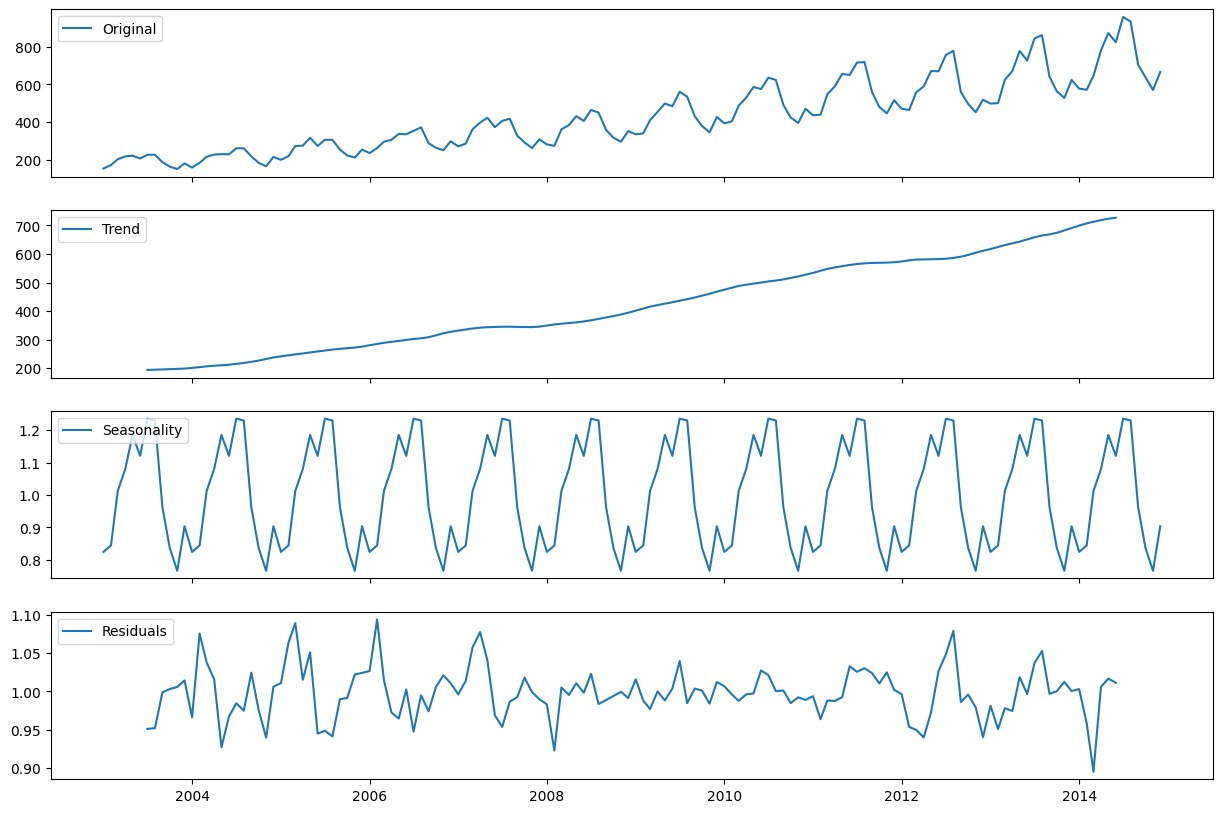

In [16]:
fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(15)

axes[0].plot(df, label='Original')
axes[0].legend(loc='upper left')

axes[1].plot(estimated_trend, label='Trend')
axes[1].legend(loc='upper left')

axes[2].plot(estimated_seasonal, label='Seasonality')
axes[2].legend(loc='upper left')

axes[3].plot(estimated_residual, label='Residuals')
axes[3].legend(loc='upper left')

### Stationarity check and Preliminary visualizations (ACF, PACF)
<p> The ADF test on the original series shows a high p-value, indicating non-stationarity, which is expected due to the presence of trend and seasonality in most real-world time series. Therefore we need to differencing to make it stationary

In [17]:
# Original Series
result=adfuller(df['number_sold'])
print("ADF Test Statistic:", result[0])
print("p-value:", result[1])
print("Number of Lags Used:", result[2])
print("Number of Observations Used:", result[3])
print("crit values: ", result[4])
if result[1] <= 0.05:
    print("Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
else:
    print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

ADF Test Statistic: 1.1158932574252591
p-value: 0.9953500083802601
Number of Lags Used: 14
Number of Observations Used: 129
crit values:  {'1%': -3.482087964046026, '5%': -2.8842185101614626, '10%': -2.578864381347275}
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


#### Order of Non-seasonal Differencing
<ul>
    <li><b>ACF and PACF plot</b>: The ACF plot of the original series shows a gradual decline, enhance the presence of a trend. After first differencing, the ACF and PACF indicate some seasonality that has not been fully accounted for. After second differencing, the ACF and PACF plots show signs of over-differencing, as indicated by the significant negative lag in ACF and PACF.
    <li><b>ADF test</b>: The first order differencing was not sufficient to achieve stationarity as the p-value was still above the significance level of 0.05. The second order differencing achieved stationarity with a p-value significantly below 0.05, suggesting that the differenced series does not have a unit root and is suitable for further analysis. But there are many negative spikes with second order differencing, this suggests possibility of over-differenced.
    <li><b> Based on these findings</b>, while the second-order differencing has rendered the series stationary, it may have been over-differentiated. We will want to explore seasonal differencing given the clear seasonality present in the data, which might allow us to use a lower order of non-seasonal differencing.

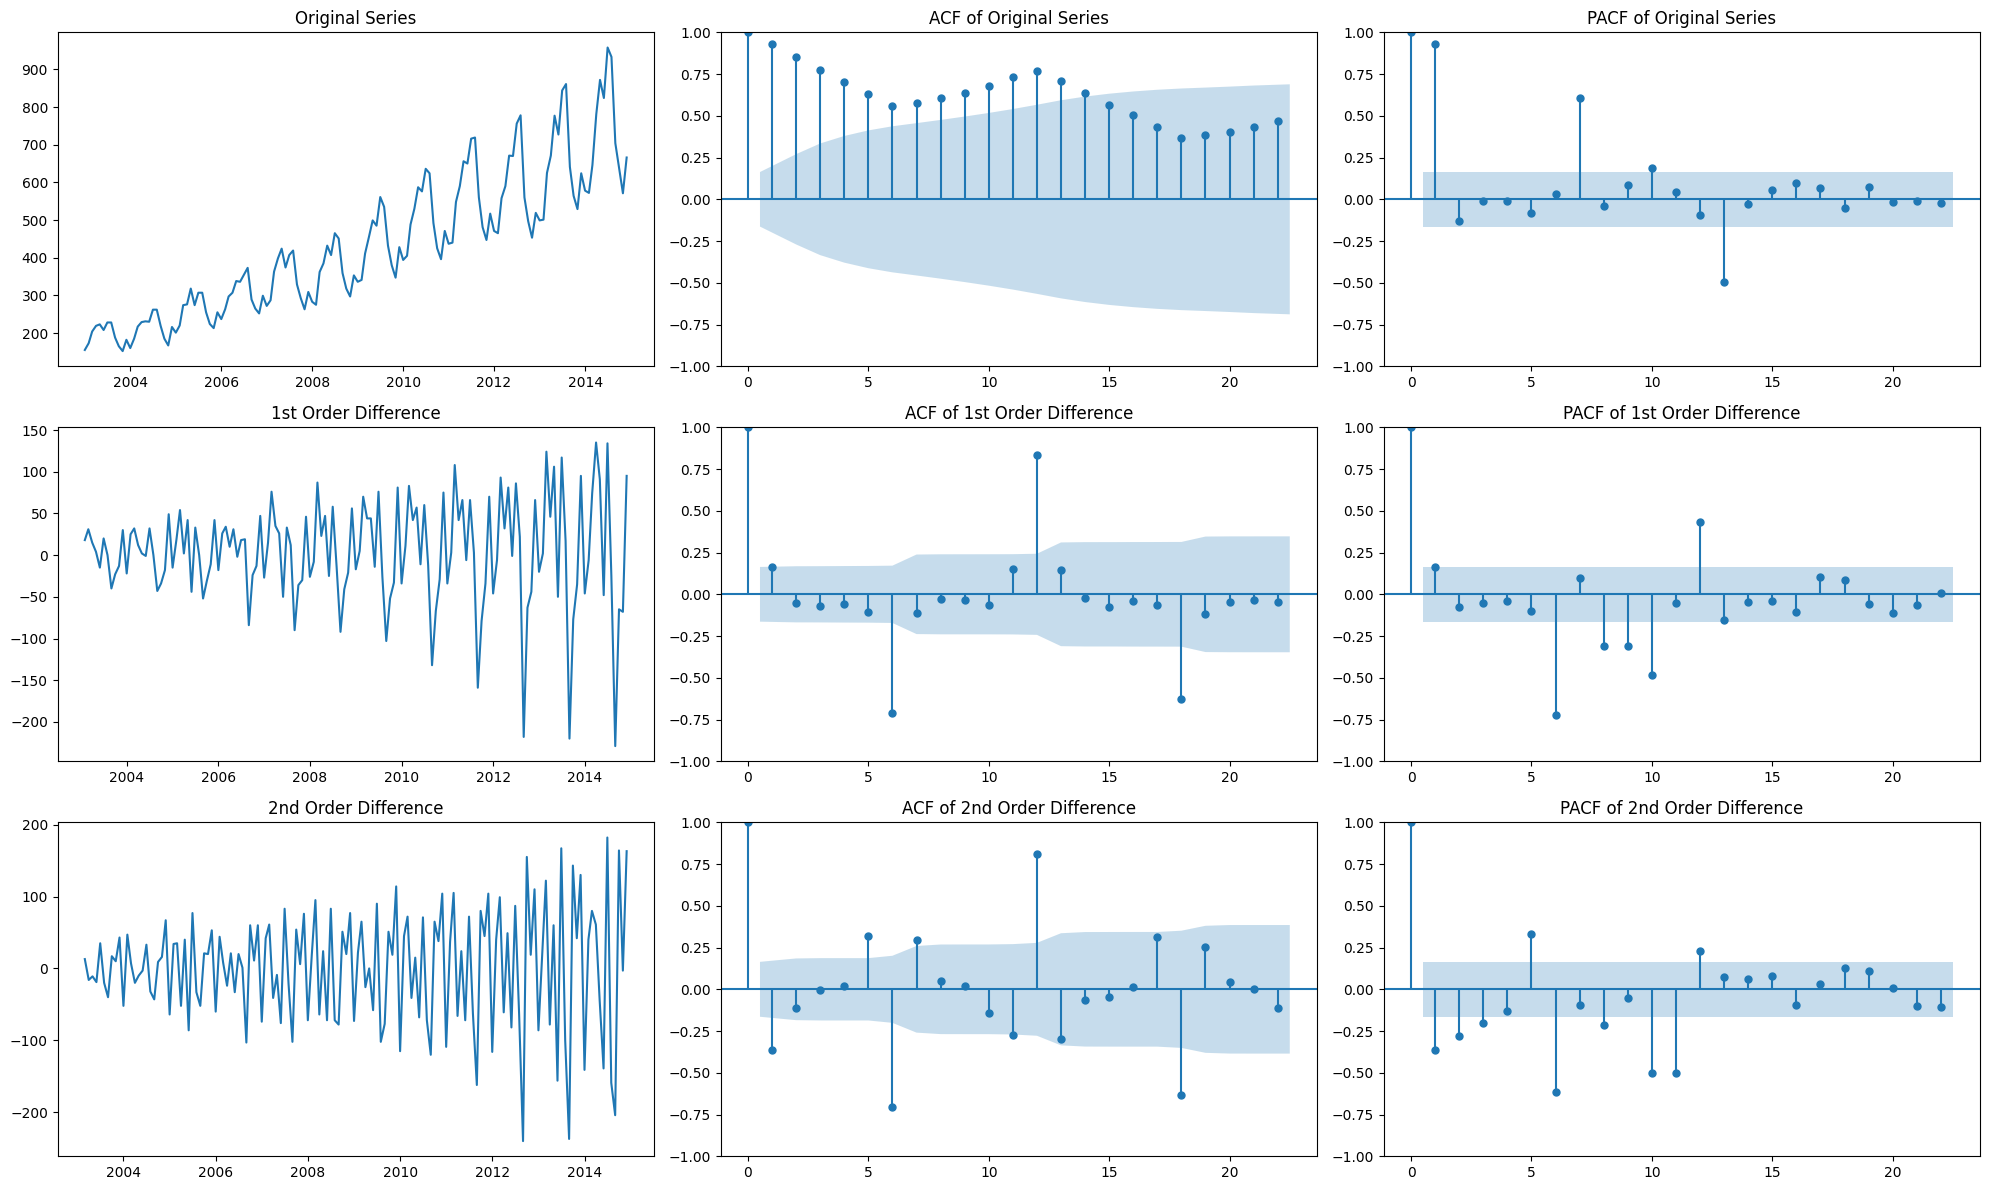

In [18]:
fig, axes = plt.subplots(3, 3, figsize=(20, 12))

# Original Series
axes[0, 0].plot(df["number_sold"])
axes[0, 0].set_title('Original Series')
plot_acf(df["number_sold"], ax=axes[0, 1])
axes[0, 1].set_title('ACF of Original Series')
plot_pacf(df["number_sold"], ax=axes[0, 2])
axes[0, 2].set_title('PACF of Original Series')

# 1st order difference
axes[1, 0].plot(df["number_sold"].diff().dropna())
axes[1, 0].set_title('1st Order Difference')
plot_acf(df["number_sold"].diff().dropna(), ax=axes[1, 1])
axes[1, 1].set_title('ACF of 1st Order Difference')
plot_pacf(df["number_sold"].diff().dropna(), ax=axes[1, 2])
axes[1, 2].set_title('PACF of 1st Order Difference')

# 2nd order difference
axes[2, 0].plot(df["number_sold"].diff().diff().dropna())
axes[2, 0].set_title('2nd Order Difference')
plot_acf(df["number_sold"].diff().diff().dropna(), ax=axes[2, 1])
axes[2, 1].set_title('ACF of 2nd Order Difference')
plot_pacf(df["number_sold"].diff().diff().dropna(), ax=axes[2, 2])
axes[2, 2].set_title('PACF of 2nd Order Difference')

plt.tight_layout()
plt.show()

In [19]:
#ADF test with 1st order difference
result=adfuller(df['number_sold'].diff().dropna())
print("ADF Test Statistic:", result[0])
print("p-value:", result[1])
print("Number of Lags Used:", result[2])
print("Number of Observations Used:", result[3])
print("crit values: ", result[4])
if result[1] <= 0.05:
    print("Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
else:
    print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

ADF Test Statistic: -2.541355326769916
p-value: 0.10573354923819672
Number of Lags Used: 14
Number of Observations Used: 128
crit values:  {'1%': -3.4825006939887997, '5%': -2.884397984161377, '10%': -2.578960197753906}
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [20]:
#ADF test with 2nd order difference
result=adfuller(df['number_sold'].diff().diff().dropna())
print("ADF Test Statistic:", result[0])
print("p-value:", result[1])
print("Number of Lags Used:", result[2])
print("Number of Observations Used:", result[3])
print("crit values: ", result[4])
if result[1] <= 0.05:
    print("Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
else:
    print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

ADF Test Statistic: -8.64960599310258
p-value: 5.158038063798361e-14
Number of Lags Used: 13
Number of Observations Used: 128
crit values:  {'1%': -3.4825006939887997, '5%': -2.884397984161377, '10%': -2.578960197753906}
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


#### Order of Seasonal Differencing
<ul>
    <li><b> Original Series</b>:
        <ul>
            <li><b> ACF Plot</b>: This shows a gradual decline in the bars as the lags increase. Since the bars remain above the blue shaded area (the significance threshold) for many lags, it tells us that the sales data are related to their past values over a long period. This is typical for a non-stationary series with a trend.
            <li><b> PACF Plot</b>: There is a sharp drop after the first lag, and then the bars remain mostly within the significance area. This indicates that the current sales are significantly influenced by the sales of the previous month, but this influence doesn't persist strongly over multiple past months.
        </ul>
    <li><b> 1st Order Seasonal Difference</b>:
        <ul>
            <li><b> ACF Plot</b>: There are multiple spikes above the significance level at the initial lags, which then gradually descrease. This suggests that even after removing the seasonal pattern, the data might still be affected by short-term correlations.
            <li><b> PACF Plot</b>: We see a significant spike at lag 1, which then drops off, suggesting that the immediate past month's sales are quite influential. However, there are no significant spikes at the seasonal lags like 12, 24, etc., suggesting that the seasonal effect might have been removed by the first difference.
            <li><b> ADF test</b>: The ADF test on the 1st seasonal differeneced series shows a lower p-value than 0.05, indicating stationarity
        </ul>
    <li><b> 2nd Order Seasonal Difference</b>:
        <ul>
            <li><b> ACF Plot</b>: There are a number of spikes extending above the significance threshold at some initial lags.
            <li><b> PACF Plot</b>: Similar to the ACF, the significant spike at lag 1 followed by bars within the significance threshold suggests that sales are primarily influenced by the immediate past month, but not by more distant past months.
        </ul>
    <li><b> To sum up</b>:
        <ul>
            <li> The original data seems to have a trend since the ACF is slowly declining and the PACF has a sharp drop.
            <li> The 1st order seasonal difference removes some of the trend and seasonality but still shows short-term correlation. Result from ADF test shows stationarity
            <li> The 2nd order seasonal difference may be too much, as indicated by the ACF and PACF patterns, which no longer show a clear seasonal pattern and suggest possible over-differencing.
            <li> Based on these observations, we will model the dataset with a 1st order seasonal difference.

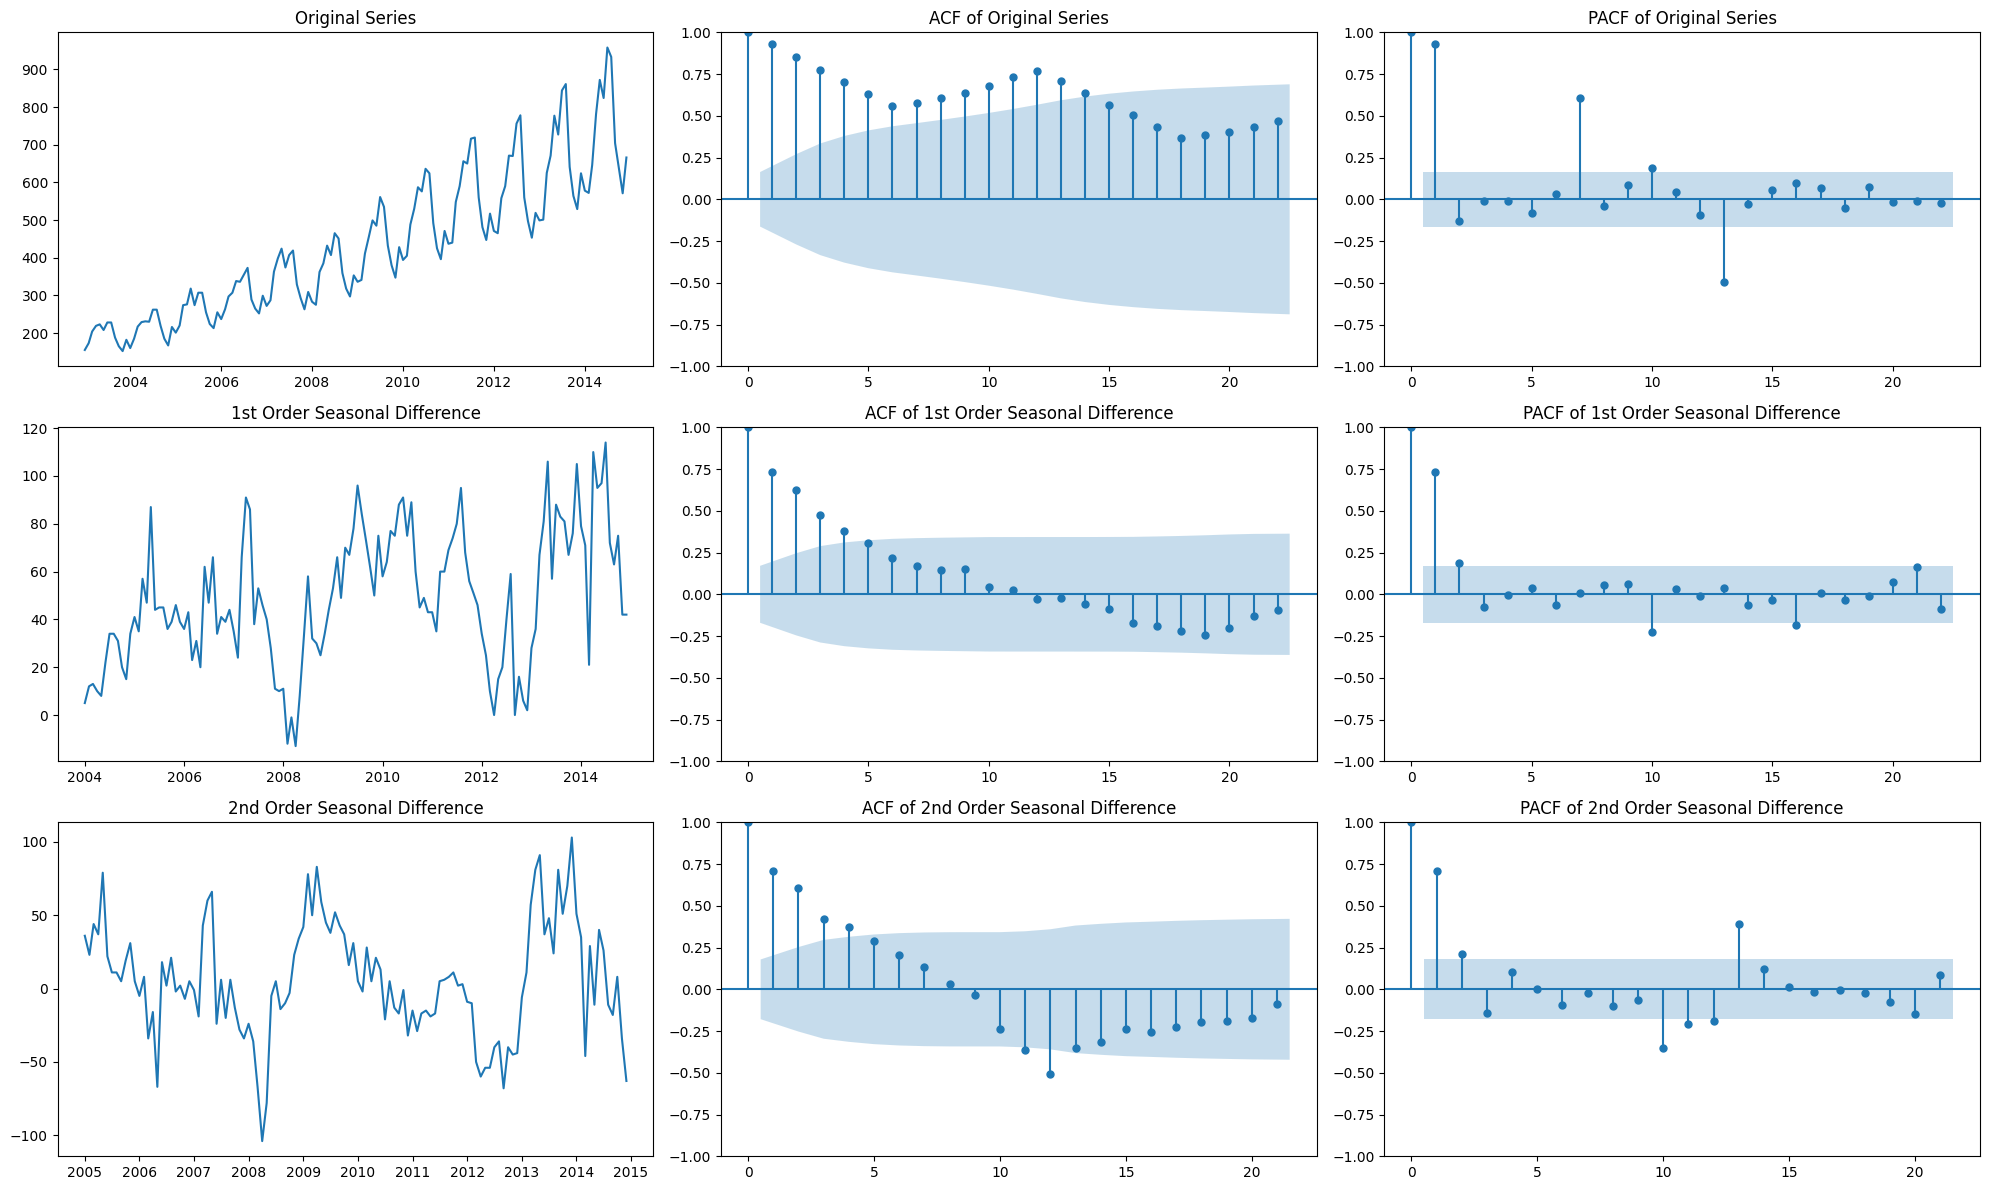

In [21]:
fig, axes = plt.subplots(3, 3, figsize=(20, 12))

# Original Series
axes[0, 0].plot(df["number_sold"])
axes[0, 0].set_title('Original Series')
plot_acf(df["number_sold"], ax=axes[0, 1])
axes[0, 1].set_title('ACF of Original Series')
plot_pacf(df["number_sold"], ax=axes[0, 2])
axes[0, 2].set_title('PACF of Original Series')

# 1st order seasonal difference
axes[1, 0].plot(df["number_sold"].diff(12).dropna())
axes[1, 0].set_title('1st Order Seasonal Difference')
plot_acf(df["number_sold"].diff(12).dropna(), ax=axes[1, 1])
axes[1, 1].set_title('ACF of 1st Order Seasonal Difference')
plot_pacf(df["number_sold"].diff(12).dropna(), ax=axes[1, 2])
axes[1, 2].set_title('PACF of 1st Order Seasonal Difference')

# 2nd order seasonal difference
axes[2, 0].plot(df["number_sold"].diff(12).diff(12).dropna())
axes[2, 0].set_title('2nd Order Seasonal Difference')
plot_acf(df["number_sold"].diff(12).diff(12).dropna(), ax=axes[2, 1])
axes[2, 1].set_title('ACF of 2nd Order Seasonal Difference')
plot_pacf(df["number_sold"].diff(12).diff(12).dropna(), ax=axes[2, 2])
axes[2, 2].set_title('PACF of 2nd Order Seasonal Difference')

plt.tight_layout()
plt.show()

In [22]:
#ADF test with 1st order of seasonal difference
result=adfuller(df['number_sold'].diff(12).dropna())
print("ADF Test Statistic:", result[0])
print("p-value:", result[1])
print("Number of Lags Used:", result[2])
print("Number of Observations Used:", result[3])
print("crit values: ", result[4])
if result[1] <= 0.05:
    print("Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
else:
    print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

ADF Test Statistic: -3.5079300409395344
p-value: 0.007785754185827427
Number of Lags Used: 1
Number of Observations Used: 130
crit values:  {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


### Split data into training and testing

<p> We will predict the last 12 months

In [23]:
df_train = df.loc["2003-01-01":"2013-12-31"]
df_test = df.loc["2014-01-01":"2014-12-31"]

## Data modeling
<p> In each model, we will so the following steps:
    <ul>
        <li> Plot the ACF and PACF with the training set
        <li> Perform the ADF test on the training set
        <li> If the first few differences can not make the time series stationary, we will try logarithms transformation on the training set to stabilise the variance of the time series and reduce the skewness of the distribution. And then plot the ACF and PACF and perform the ADF test again.
        <li> Determine the order of non-seasonal/seasonal differencing, AR term and MA term
        <li> Fit model to the training set
        <li> Use the model to forecast the last 12 months
        <li> Calculate MAE, MAPE, MSE, R2 between the testing set and the forecast result
        <li> Plot the residual diagnostics
    </ul>
<p> We will compare all model performance base on AIC, R2, MAE, MAPE, MSE and then pick the best performing one. Then we will further evaluate the best performning model with time series-cross validation to estimate how reliable and stable of the model's performance over time.

In [24]:
model_performance_summary = []

### ARIMA
<ul>
    <li> The first order differencing was not sufficient to achieve stationarity as the p-value was still above the significance level of 0.05. The second order differencing achieved stationarity with a p-value significantly below 0.05, suggesting that the differenced series is stationary and suitable for further analysis. But there are many negative spikes with second order differencing, this suggests possibility of over-differenced.
    <li> Therefore, we try logarithms transformation on the training set to stabilise the variance of the time series and reduce the skewness of the distribution <a href="https://otexts.com/fpp2/stationarity.html">(reference here)</a>. And then plot the ACF and PACF and ADF test again with the log transformed data.
    <li> With the log transformed training set:
        <ul>
            <li> ADF and KPSS test both indicate the series is stationary after the first differencing. The order of differencing would be 1 (d=1)
            <li> ACF and PACF Plots: after the first differencing the ACF and PACF plots do not show significant spikes, this would justify the non-seasonal ARIMA(0,1,0) model choice.
            <li> We can observe many negative spikes in the ACF and PACF plots for the second differenced series suggests over-differencing, so it's a good decision to use only the first differenced series.
        </ul>
    <li> With the ARIMA(0,1,0) model on log transformed training set:
        <ul>
            <li> The model is trained on the log-differenced data, and it finds that the best prediction for any future value is just the last observed value of the differenced series (which is close to zero). When we apply the exponential function to get back to the original scale, this differenced prediction is translated into a multiplication by 1 (because exp(0) = 1).Therefore, all predictions on the original scale are essentially just the last observed value of the non-differenced, log-transformed series (hence 624). This can be an indicator that the ARIMA(0,1,0) model is too simplistic for this dataset, which seems to be more complex than the model can capture. In practice, this model is not used for actual forecasting unless we really have no other information, as it does not forecast any change over time. In this assignment, we still keep this model for later on comparision for learning purpose.
            <li> Evaluation measures:
                <ul>
                    <li> MAE (Mean Absolute Error) is moderately low, which suggests that on average, the model's predictions are about 129.83 units away from the actual values. Given the scale of this data which is 806, this could be a reasonable error.
                    <li> MAPE (Mean Absolute Percentage Error) is about 15.88%, which means that the model's predictions are off by 15.88% on average. This could be considered acceptable.
                    <li> MSE (Mean Squared Error) is quite high, indicating that there are instances where the model's predictions are significantly off.
                    <li> R-squared is negative (-0.602), indicating that the model performs worse than a simple horizontal line at the mean of the dependent variable. This is a sign that the model may not be capturing the underlying process effectively. This result is reasonable because this dataset have seasonal component which this simple non-seasonal ARIMA can not capture.
                </ul>
            <li> Residual diagnostics:
                <ul>
                    <li> The standardized residuals plot shows the residuals over time. Ideally, these should look like white noise, meaning no discernible patterns. In this case, the plot shows some structure, suggesting that the model is not capturing all the dependencies in the data.
                    <li> The histogram plus KDE (Kernel Density Estimate) shows the distribution of residuals along with a fitted normal distribution (N(0,1)). The residuals appear to have a distribution with heavier tails than the normal distribution, indicating the presence of outliers or extreme values the model isn't capturing well.
                    <li> The Normal Q-Q plot helps us assess whether the residuals follow a normal distribution. In this case, the points follow the line closely except in the tails, again indicating heavier tails in the distribution of residuals.
                    <li> The correlogram (ACF plot) of the residuals should show no significant autocorrelation at any lag. This plot shows that most lags are within the confidence bounds, which is a good sign, indicating no obvious autocorrelation issues. There is one spike is outside and there is no pattern that indicates a need for additional model terms.
                </ul>
            <li> We will look into different model specifications, SARIMA models, because in this ARIMA model seasonality trends are not being captured.
        </ul>


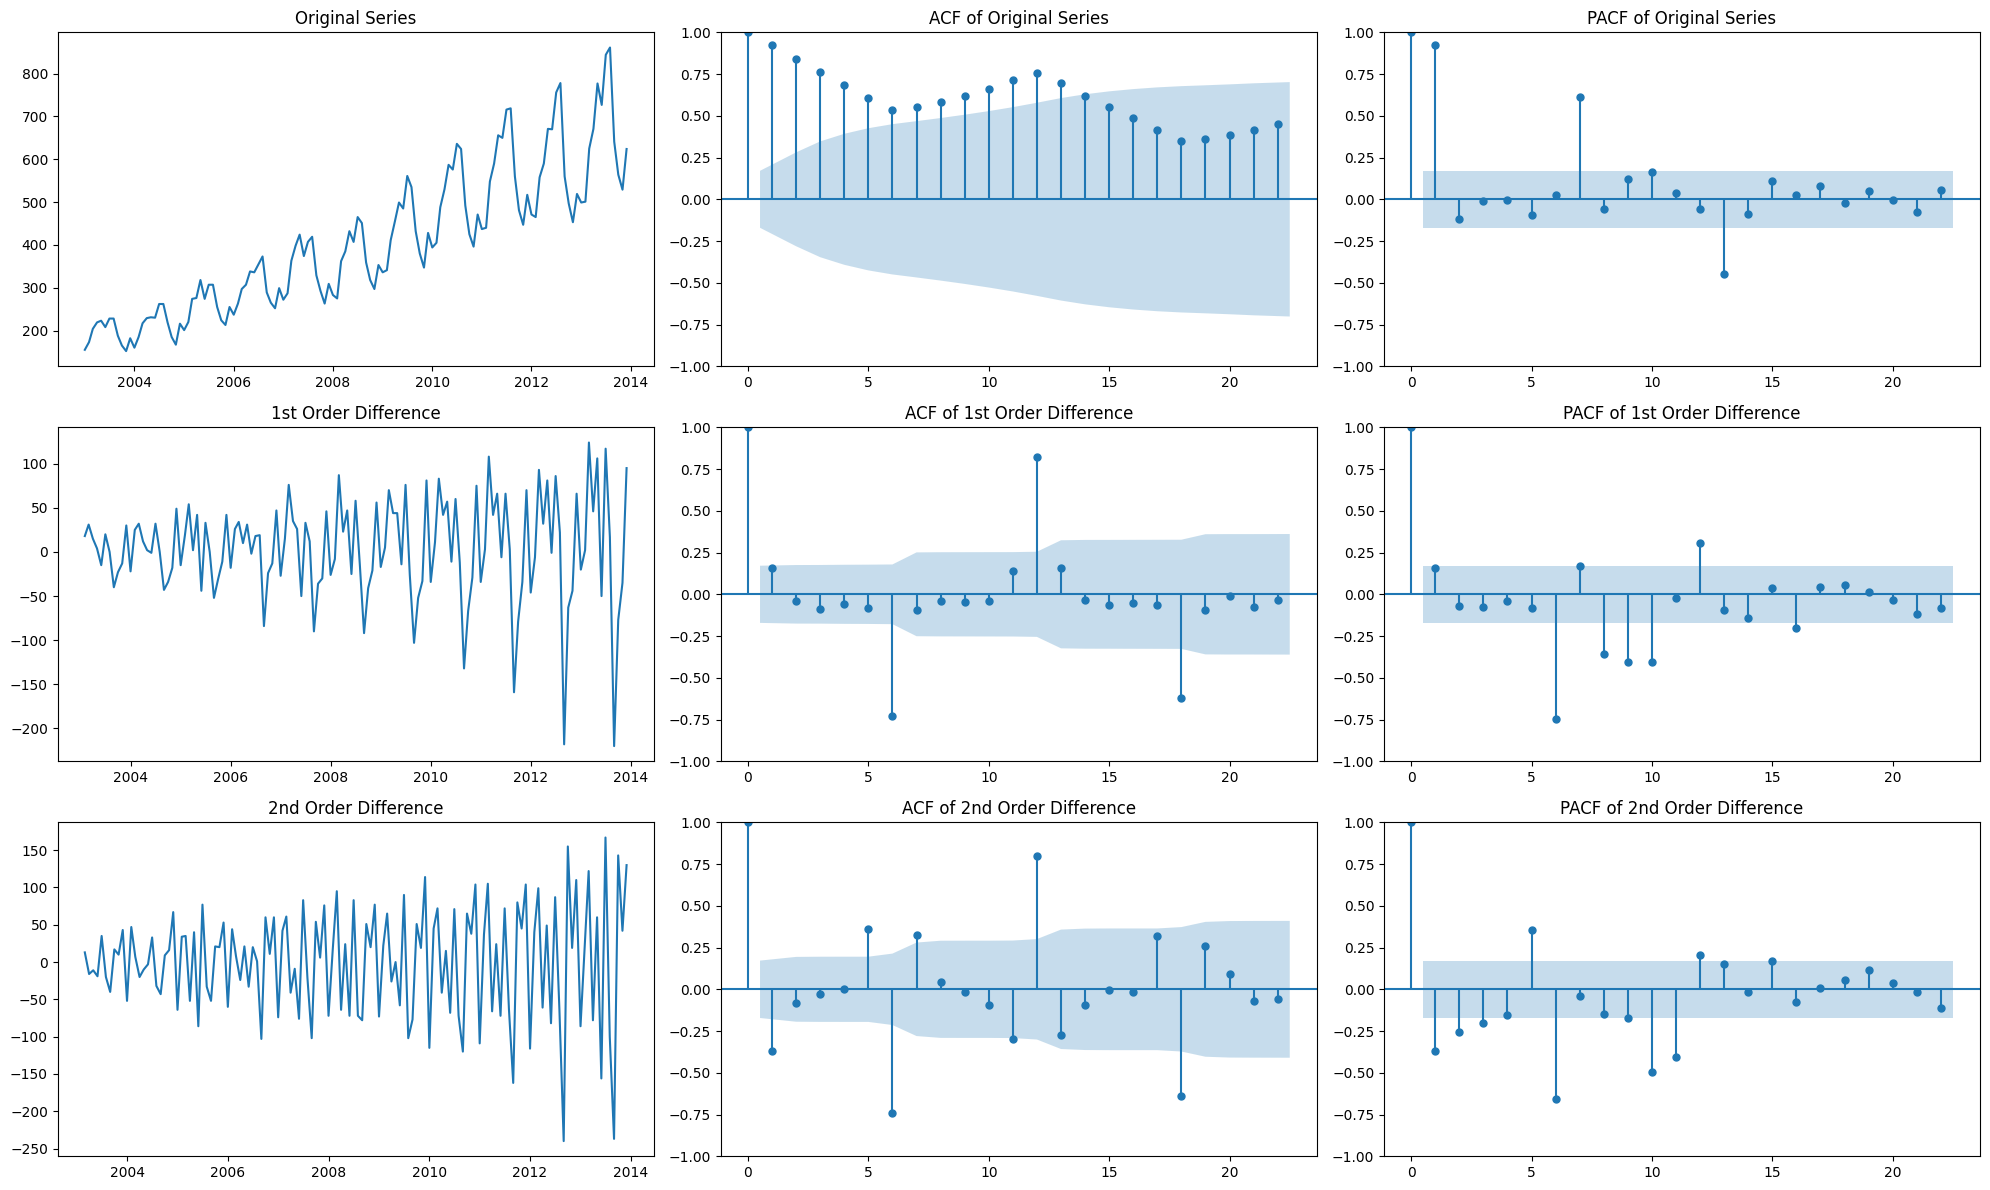

In [25]:
fig, axes = plt.subplots(3, 3, figsize=(20, 12))

# Original Series
axes[0, 0].plot(df_train["number_sold"])
axes[0, 0].set_title('Original Series')
plot_acf(df_train["number_sold"], ax=axes[0, 1])
axes[0, 1].set_title('ACF of Original Series')
plot_pacf(df_train["number_sold"], ax=axes[0, 2])
axes[0, 2].set_title('PACF of Original Series')

# 1st order difference
axes[1, 0].plot(df_train["number_sold"].diff().dropna())
axes[1, 0].set_title('1st Order Difference')
plot_acf(df_train["number_sold"].diff().dropna(), ax=axes[1, 1])
axes[1, 1].set_title('ACF of 1st Order Difference')
plot_pacf(df_train["number_sold"].diff().dropna(), ax=axes[1, 2])
axes[1, 2].set_title('PACF of 1st Order Difference')

# 2nd order difference
axes[2, 0].plot(df_train["number_sold"].diff().diff().dropna())
axes[2, 0].set_title('2nd Order Difference')
plot_acf(df_train["number_sold"].diff().diff().dropna(), ax=axes[2, 1])
axes[2, 1].set_title('ACF of 2nd Order Difference')
plot_pacf(df_train["number_sold"].diff().diff().dropna(), ax=axes[2, 2])
axes[2, 2].set_title('PACF of 2nd Order Difference')

plt.tight_layout()
plt.show()

In [26]:
#ADF test with 0 order difference
result=adfuller(df_train['number_sold'].dropna())
print("ADF Test Statistic:", result[0])
print("p-value:", result[1])
print("Number of Lags Used:", result[2])
print("Number of Observations Used:", result[3])
print("crit values: ", result[4])
if result[1] <= 0.05:
    print("Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
else:
    print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

ADF Test Statistic: 0.9836215767061222
p-value: 0.9940900956989316
Number of Lags Used: 13
Number of Observations Used: 118
crit values:  {'1%': -3.4870216863700767, '5%': -2.8863625166643136, '10%': -2.580009026141913}
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [27]:
#ADF test with 1st order difference
result=adfuller(df_train['number_sold'].diff().dropna())
print("ADF Test Statistic:", result[0])
print("p-value:", result[1])
print("Number of Lags Used:", result[2])
print("Number of Observations Used:", result[3])
print("crit values: ", result[4])
if result[1] <= 0.05:
    print("Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
else:
    print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

ADF Test Statistic: -2.252065782352774
p-value: 0.18789378681752894
Number of Lags Used: 12
Number of Observations Used: 118
crit values:  {'1%': -3.4870216863700767, '5%': -2.8863625166643136, '10%': -2.580009026141913}
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [28]:
#ADF test with 2nd order difference
result=adfuller(df_train['number_sold'].diff().diff().dropna())
print("ADF Test Statistic:", result[0])
print("p-value:", result[1])
print("Number of Lags Used:", result[2])
print("Number of Observations Used:", result[3])
print("crit values: ", result[4])
if result[1] <= 0.05:
    print("Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
else:
    print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

ADF Test Statistic: -7.423580116707972
p-value: 6.637980522493131e-11
Number of Lags Used: 13
Number of Observations Used: 116
crit values:  {'1%': -3.4880216384691867, '5%': -2.8867966864160075, '10%': -2.5802408234244947}
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [29]:
df_train["number_sold_log"] = np.log(df_train["number_sold"])

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9432\2373858054.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



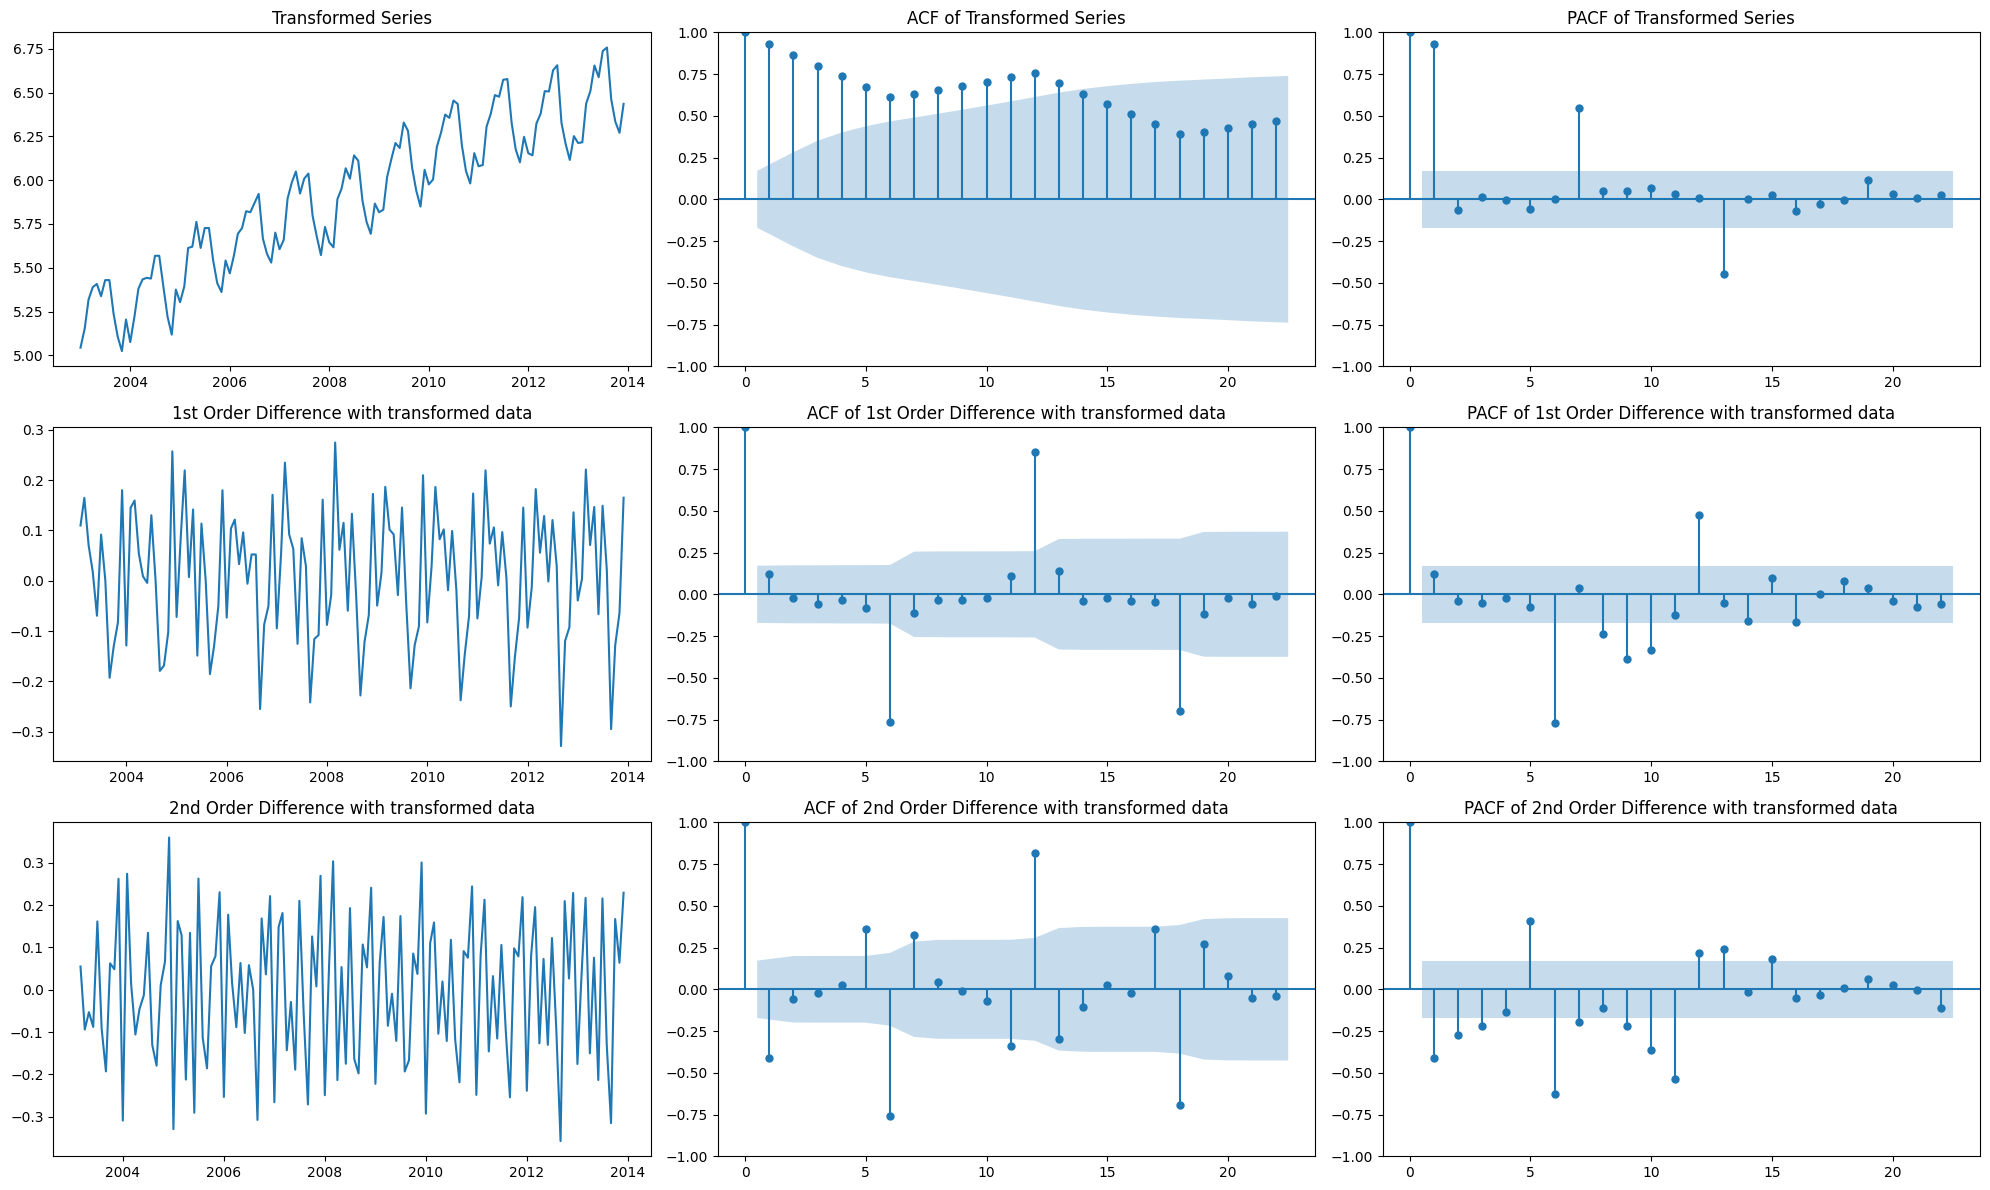

In [30]:
fig, axes = plt.subplots(3, 3, figsize=(20, 12))

# transformed Series
axes[0, 0].plot(df_train["number_sold_log"])
axes[0, 0].set_title('Transformed Series')
plot_acf(df_train["number_sold_log"], ax=axes[0, 1])
axes[0, 1].set_title('ACF of Transformed Series')
plot_pacf(df_train["number_sold_log"], ax=axes[0, 2])
axes[0, 2].set_title('PACF of Transformed Series')

# 1st order difference
axes[1, 0].plot(df_train["number_sold_log"].diff().dropna())
axes[1, 0].set_title('1st Order Difference with transformed data')
plot_acf(df_train["number_sold_log"].diff().dropna(), ax=axes[1, 1])
axes[1, 1].set_title('ACF of 1st Order Difference with transformed data')
plot_pacf(df_train["number_sold_log"].diff().dropna(), ax=axes[1, 2])
axes[1, 2].set_title('PACF of 1st Order Difference with transformed data')

# 2nd order difference
axes[2, 0].plot(df_train["number_sold_log"].diff().diff().dropna())
axes[2, 0].set_title('2nd Order Difference with transformed data')
plot_acf(df_train["number_sold_log"].diff().diff().dropna(), ax=axes[2, 1])
axes[2, 1].set_title('ACF of 2nd Order Difference with transformed data')
plot_pacf(df_train["number_sold_log"].diff().diff().dropna(), ax=axes[2, 2])
axes[2, 2].set_title('PACF of 2nd Order Difference with transformed data')

plt.tight_layout()
plt.show()

In [31]:
#ADF test with 0 order difference with transformed data
result=adfuller(df_train['number_sold_log'].dropna())
print("ADF Test Statistic:", result[0])
print("p-value:", result[1])
print("Number of Lags Used:", result[2])
print("Number of Observations Used:", result[3])
print("crit values: ", result[4])
if result[1] <= 0.05:
    print("Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
else:
    print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

ADF Test Statistic: -1.279227292045865
p-value: 0.6386214653093986
Number of Lags Used: 13
Number of Observations Used: 118
crit values:  {'1%': -3.4870216863700767, '5%': -2.8863625166643136, '10%': -2.580009026141913}
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [32]:
#ADF test with 1st order difference with transformed data
result=adfuller(df_train['number_sold_log'].diff().dropna())
print("ADF Test Statistic:", result[0])
print("p-value:", result[1])
print("Number of Lags Used:", result[2])
print("Number of Observations Used:", result[3])
print("crit values: ", result[4])
if result[1] <= 0.05:
    print("Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
else:
    print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

ADF Test Statistic: -2.8814401979567377
p-value: 0.04754920982800205
Number of Lags Used: 12
Number of Observations Used: 118
crit values:  {'1%': -3.4870216863700767, '5%': -2.8863625166643136, '10%': -2.580009026141913}
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [33]:
#KPSS test with 1st order difference with transformed data
result = kpss(df_train['number_sold_log'].diff().dropna(), 'ct')
print("KPSS Statistic:", result[0])
print("p-value:", result[1])
print("crit Values:", result[3])
if result[1] <= 0.05:
    print("Strong evidence against the null hypothesis, reject the null hypothesis. Data is non-stationary")
else:
    print("Weak evidence against null hypothesis, time series is stationary ")

KPSS Statistic: 0.012606797206902486
p-value: 0.1
crit Values: {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}
Weak evidence against null hypothesis, time series is stationary 


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9432\3018276035.py:2: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




In [34]:
# 0,1,0 ARIMA Model
model = ARIMA(df_train["number_sold_log"], order=(0,1,0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:        number_sold_log   No. Observations:                  132
Model:                 ARIMA(0, 1, 0)   Log Likelihood                  81.826
Date:                Thu, 04 Apr 2024   AIC                           -161.653
Time:                        12:53:34   BIC                           -158.777
Sample:                    01-01-2003   HQIC                          -160.484
                         - 12-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0168      0.003      6.683      0.000       0.012       0.022
Ljung-Box (L1) (Q):                   1.91   Jarque-Bera (JB):                 3.12
Prob(Q):                              0.17   Pr

c:\Users\LENOVO\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

c:\Users\LENOVO\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

c:\Users\LENOVO\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



In [35]:
#use np.exp() to convert the log scaled prediction to normal scale
df_test['forecast_manual_ARIMA']=np.exp(model_fit.predict("2014-01-01", "2014-12-01", dynamic=True))

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9432\2690983024.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [36]:
df_test

,number_sold,forecast_manual_ARIMA
month,,
2014-01-01,578,624.0
2014-02-01,572,624.0
2014-03-01,646,624.0
2014-04-01,781,624.0
2014-05-01,872,624.0
2014-06-01,824,624.0
2014-07-01,958,624.0
2014-08-01,933,624.0
2014-09-01,704,624.0


In [37]:
print("MAE:",mean_absolute_error(df_test["number_sold"], df_test["forecast_manual_ARIMA"]))
print("MAPE:",mean_absolute_percentage_error(df_test["number_sold"], df_test["forecast_manual_ARIMA"]))
print("MSE:",mean_squared_error(df_test["number_sold"], df_test["forecast_manual_ARIMA"]))
print("R2:",r2_score(df_test["number_sold"], df_test["forecast_manual_ARIMA"]))

MAE: 129.8333333333333
MAPE: 0.15879349786246458
MSE: 29140.99999999998
R2: -0.6023962412859778


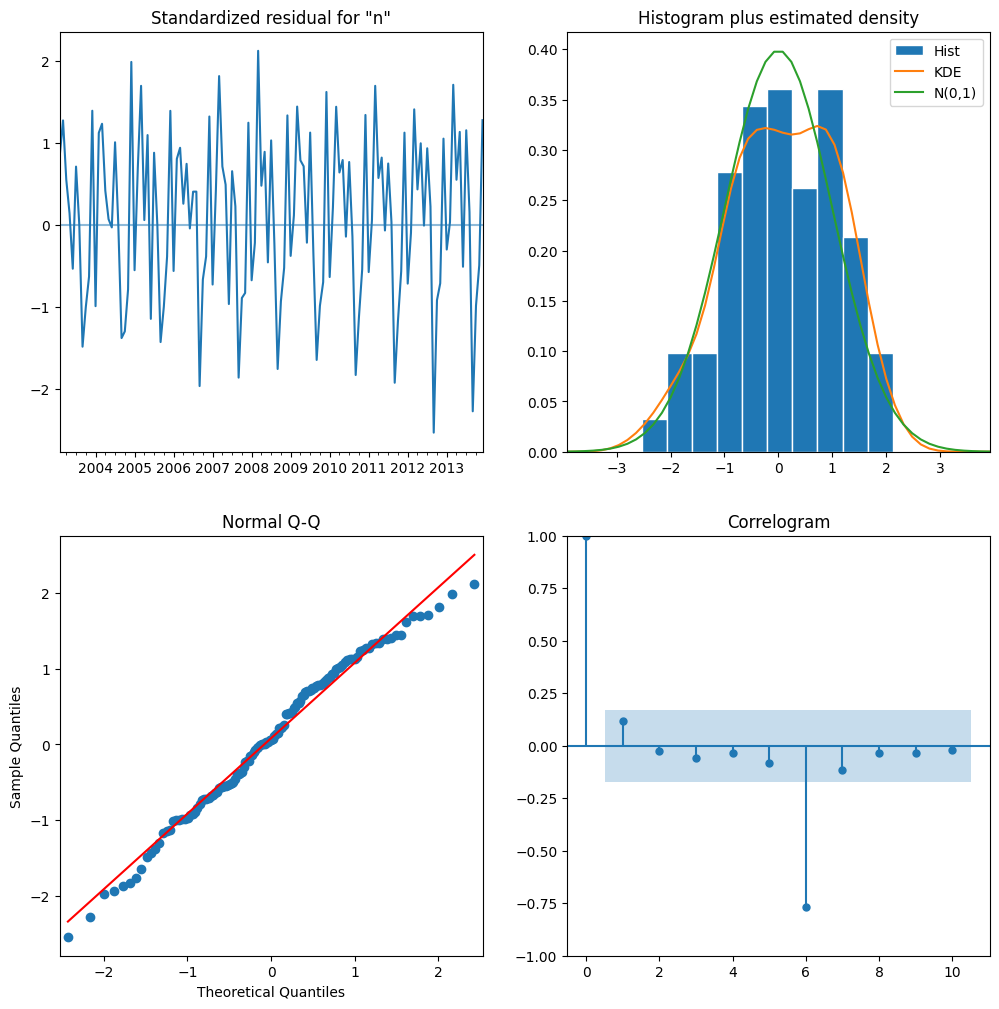

In [38]:
model_fit.plot_diagnostics(figsize=(12,12))
plt.show()

In [39]:
model_performance_summary.append({"Method":"Manual",
                                  "Model":"ARIMA"+str(model_fit.model.order),
                                  "MAE":mean_absolute_error(df_test["number_sold"], df_test["forecast_manual_ARIMA"]),
                                  "MAPE": mean_absolute_percentage_error(df_test["number_sold"], df_test["forecast_manual_ARIMA"]),
                                  "MSE":mean_squared_error(df_test["number_sold"], df_test["forecast_manual_ARIMA"]),
                                  "R2": r2_score(df_test["number_sold"], df_test["forecast_manual_ARIMA"]),
                                  "AIC": model_fit.aic})

### SARIMA
<ul>
    <li> For comparision purpose, we will also try logarithms transformation on the training set to stabilise the variance of the time series and reduce the skewness of the distribution <a href="https://otexts.com/fpp2/stationarity.html">(reference here)</a>. And then plot the ACF and PACF and ADF test with the log transformed data.
    <li> With the log transformed training set:
        <ul>
            <li> 1st, 2nd, 3rd seasonal differencing doesnt make the series stationary, 
            <li> We will add one order of non-seasonal differencing and plot the ACF, PACF and run ADF test again
            <li> With 1st non-seasonal and 1st seasonal differencing on transformed data, ADF and KPSS test indicate the series is stationary. The order of non-seasonal and seasonal differencing would be 1 (d=1 and D=1)
            <li> ACF and PACF Plots: after 1st non-seasonal and 1st seasonal differencing the ACF and PACF plots do not show significant spikes, this would justify the non-seasonal SARIMA(0,1,0)(0,1,0,12) model choice.
            <li> We can observe many negative spikes in the ACF and PACF plots for the second differenced series suggests over-differencing, so it's a good decision to use only the first differenced series.
        </ul>
    <li> With the SARIMA(0,1,0)(0,1,0,12) model on log transformed training set:
        <ul>
            <li> Evaluation measures:
                <ul>
                    <li> MAE (Mean Absolute Error) is lower than the above ARIMA model, suggesting that on average, the SARIMA model's predictions are closer to the actual values.
                    <li> MAPE (Mean Absolute Percentage Error) is also lower, which means that the percentage error is smaller, and therefore the model is more accurate percentage-wise.
                    <li> MSE (Mean Squared Error) is significantly lower, indicating that the predictions are generally closer to the true values and there are fewer large errors.
                    <li> R-squared is positive and quite high, suggesting that the model explains a substantial portion of the variance in the data, unlike the negative R2 from the ARIMA model
                </ul>
            <li> Residual diagnostics:
                <ul>           
                    <li> The standardized residuals plot shows the residuals over time. Ideally, you want to see no pattern; the residuals should be distributed randomly around the zero line with constant variance. If there's no apparent structure, that's a sign that the model is capturing the data's patterns well.
                    <li> The histogram plus KDE (Kernel Density Estimate) compares the distribution of residuals against a normal distribution. The blue bars show the histogram of the standardized residuals, the green line represents a normal distribution, and the orange line is the KDE, which estimates the density of the residuals. A good fitting model will have residuals that are approximately normally distributed, which this graph suggests is the case as the KDE closely follows the normal distribution curve.
                    <li> The Normal Q-Q plot shows the quantiles of the residuals against the quantiles of a normal distribution. If the residuals are normally distributed, the points should lie approximately along the red line. Deviations from this line indicate departures from normality. In this plot, most points lie close to the line, which is a good indication that the residuals are normally distributed.
                    <li> The correlogram (ACF plot) of the residuals shows the autocorrelations of the residuals at different lags. Ideally, all autocorrelations should be within the blue area, indicating that they are not statistically significant, and thus there is no autocorrelation in the residuals. In this plot, spikes were outside the blue area, that would indicate potential autocorrelation at those lags. This would be a sign that the model may not be fully adequate and could possibly be improved by adjusting the parameters or by considering different models.
                </ul>
            <li> Overall, these diagnostics suggest that SARIMA(0,1,0)(0,1,0,12) model is performing well. The residuals appear to be random, with no clear pattern over time, and are approximately normally distributed. There’s no significant autocorrelation remaining in the residuals, indicating the model is capturing the time series' structure adequately. These are all good signs that the model is appropriate for the data.
        </ul>

In [40]:
# for comparision purpose we will transform the data before fit it with SARIMA model
df_train["number_sold_log"] = np.log(df_train["number_sold"])

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9432\3028396988.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



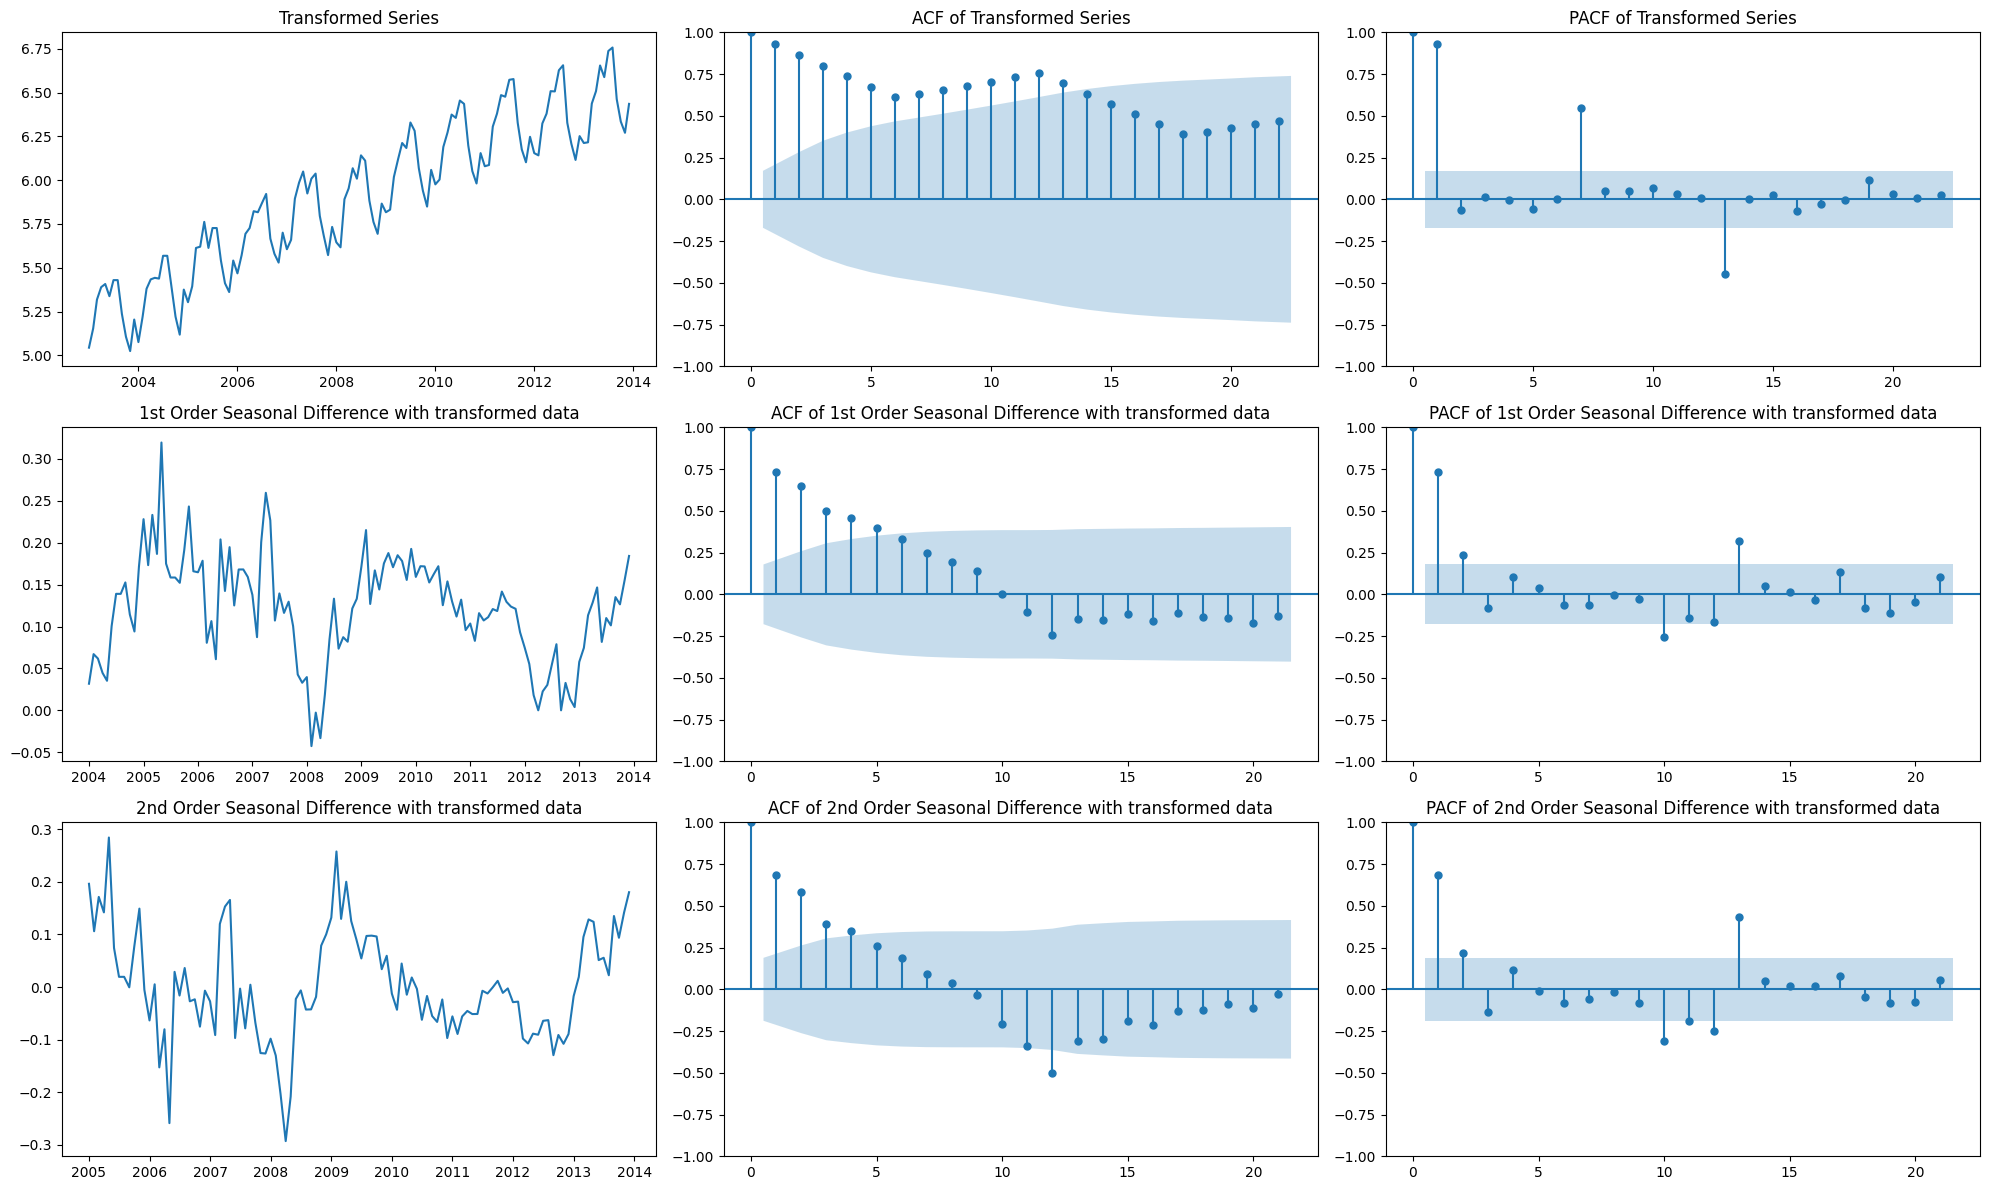

In [41]:
fig, axes = plt.subplots(3, 3, figsize=(20, 12))

# Transformed Series
axes[0, 0].plot(df_train["number_sold_log"])
axes[0, 0].set_title('Transformed Series')
plot_acf(df_train["number_sold_log"], ax=axes[0, 1])
axes[0, 1].set_title('ACF of Transformed Series')
plot_pacf(df_train["number_sold_log"], ax=axes[0, 2])
axes[0, 2].set_title('PACF of Transformed Series')

# 1st order Seasonal difference with transformed data
axes[1, 0].plot(df_train["number_sold_log"].diff(12).dropna())
axes[1, 0].set_title('1st Order Seasonal Difference with transformed data')
plot_acf(df_train["number_sold_log"].diff(12).dropna(), ax=axes[1, 1])
axes[1, 1].set_title('ACF of 1st Order Seasonal Difference with transformed data')
plot_pacf(df_train["number_sold_log"].diff(12).dropna(), ax=axes[1, 2])
axes[1, 2].set_title('PACF of 1st Order Seasonal Difference with transformed data')

# 2nd order Seasonal difference with transformed data
axes[2, 0].plot(df_train["number_sold_log"].diff(12).diff(12).dropna())
axes[2, 0].set_title('2nd Order Seasonal Difference with transformed data')
plot_acf(df_train["number_sold_log"].diff(12).diff(12).dropna(), ax=axes[2, 1])
axes[2, 1].set_title('ACF of 2nd Order Seasonal Difference with transformed data')
plot_pacf(df_train["number_sold_log"].diff(12).diff(12).dropna(), ax=axes[2, 2])
axes[2, 2].set_title('PACF of 2nd Order Seasonal Difference with transformed data')

plt.tight_layout()
plt.show()

In [42]:
#ADF test with 1st order Seasonal difference with transformed data
result=adfuller(df_train['number_sold_log'].diff(12).dropna())
print("ADF Test Statistic:", result[0])
print("p-value:", result[1])
print("Number of Lags Used:", result[2])
print("Number of Observations Used:", result[3])
print("crit values: ", result[4])
if result[1] <= 0.05:
    print("Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
else:
    print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

ADF Test Statistic: -2.603091380782665
p-value: 0.09236002369690033
Number of Lags Used: 12
Number of Observations Used: 107
crit values:  {'1%': -3.492995948509562, '5%': -2.888954648057252, '10%': -2.58139291903223}
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [43]:
#ADF test with 2nd order Seasonal difference with transformed data
result=adfuller(df_train['number_sold_log'].diff(12).diff(12).dropna())
print("ADF Test Statistic:", result[0])
print("p-value:", result[1])
print("Number of Lags Used:", result[2])
print("Number of Observations Used:", result[3])
print("crit values: ", result[4])
if result[1] <= 0.05:
    print("Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
else:
    print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

ADF Test Statistic: -2.5107285872599423
p-value: 0.11288571830378252
Number of Lags Used: 12
Number of Observations Used: 95
crit values:  {'1%': -3.5011373281819504, '5%': -2.8924800524857854, '10%': -2.5832749307479226}
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [44]:
#ADF test with 3rd order Seasonal difference with transformed data
result=adfuller(df_train['number_sold_log'].diff(12).diff(12).diff(12).dropna())
print("ADF Test Statistic:", result[0])
print("p-value:", result[1])
print("Number of Lags Used:", result[2])
print("Number of Observations Used:", result[3])
print("crit values: ", result[4])
if result[1] <= 0.05:
    print("Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
else:
    print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

ADF Test Statistic: -2.2458504108811015
p-value: 0.19002701600878552
Number of Lags Used: 12
Number of Observations Used: 83
crit values:  {'1%': -3.5117123057187376, '5%': -2.8970475206326833, '10%': -2.5857126912469153}
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


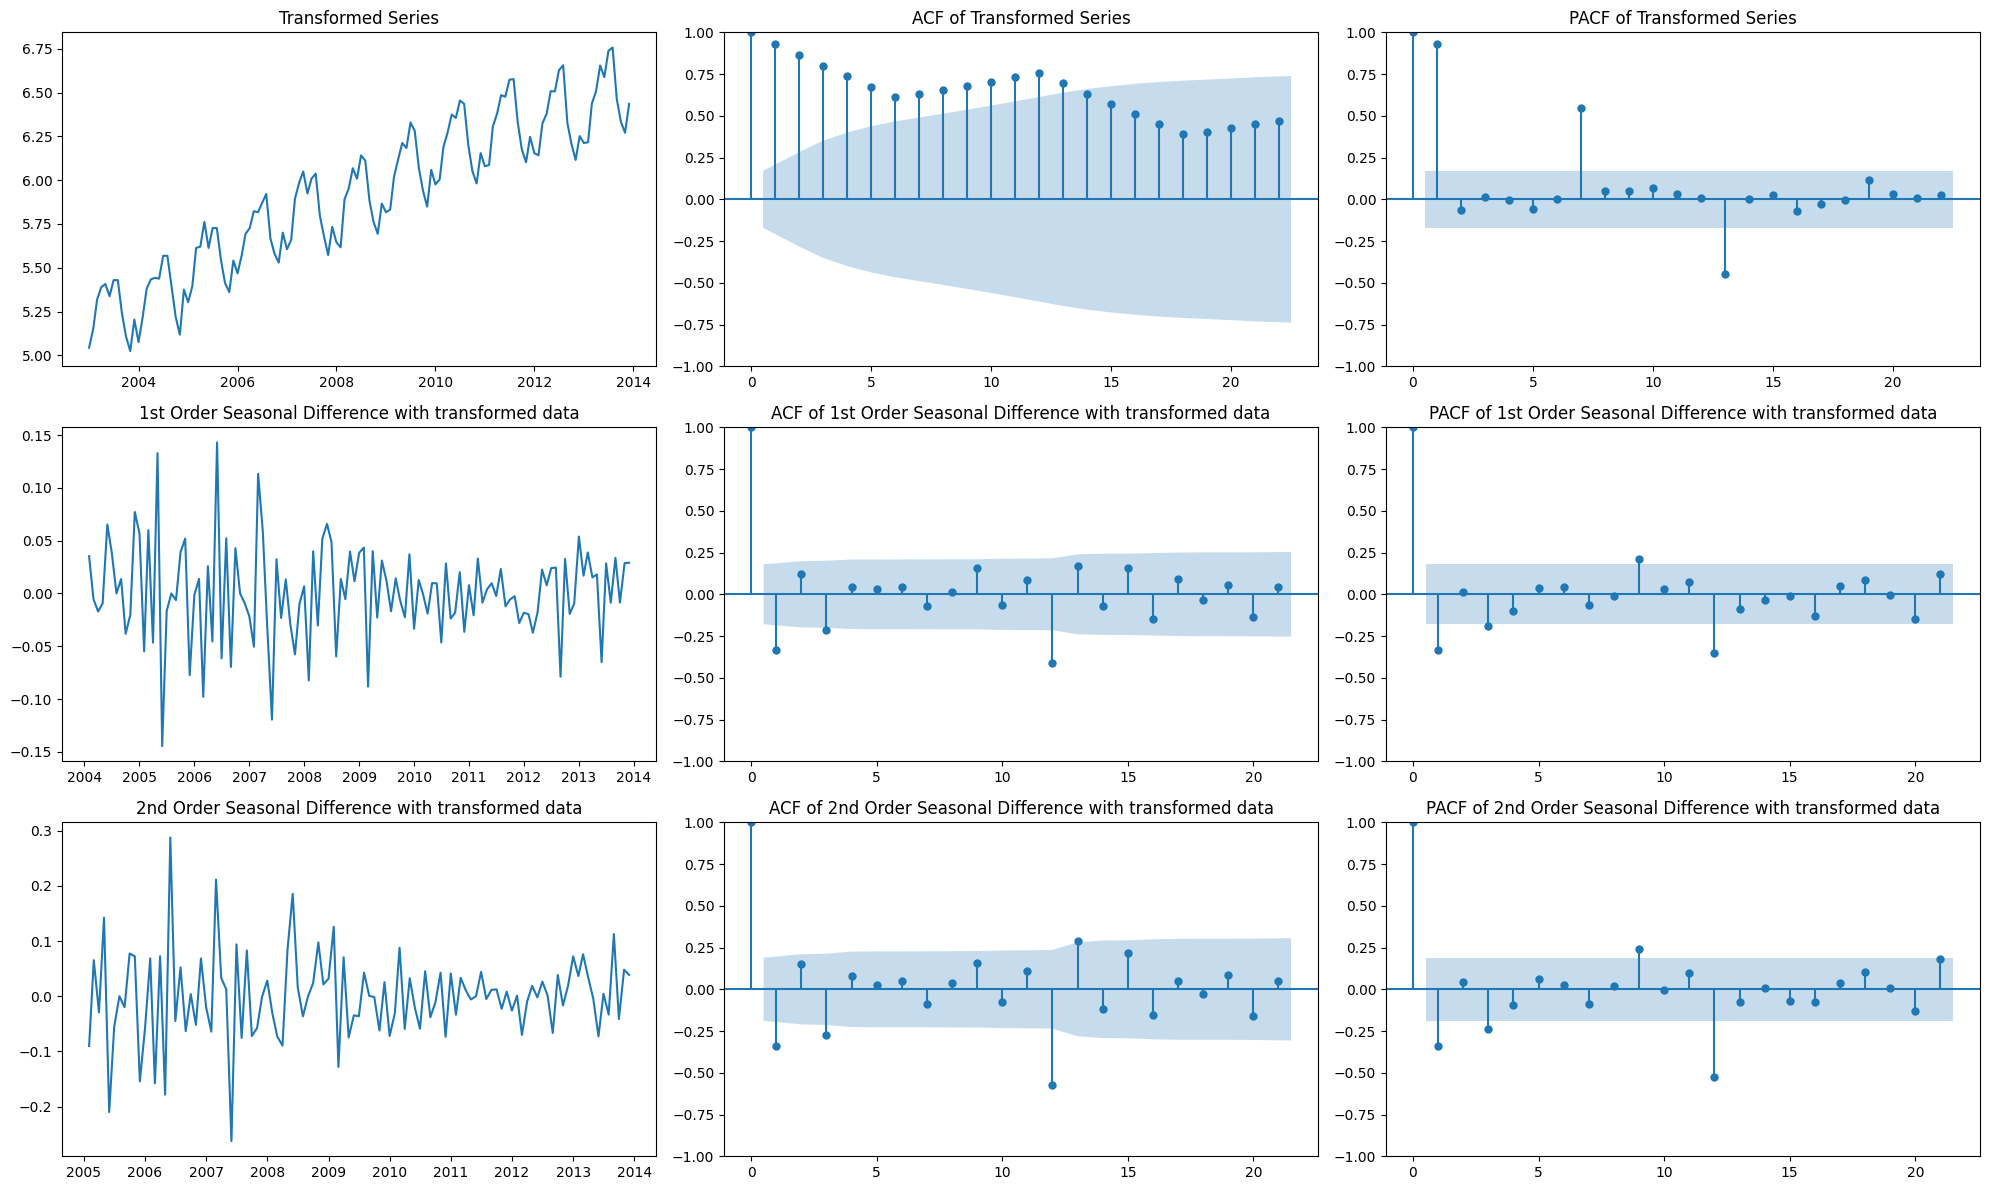

In [45]:
fig, axes = plt.subplots(3, 3, figsize=(20, 12))

# Transformed Series
axes[0, 0].plot(df_train["number_sold_log"])
axes[0, 0].set_title('Transformed Series')
plot_acf(df_train["number_sold_log"], ax=axes[0, 1])
axes[0, 1].set_title('ACF of Transformed Series')
plot_pacf(df_train["number_sold_log"], ax=axes[0, 2])
axes[0, 2].set_title('PACF of Transformed Series')

# 1st order Seasonal difference with transformed data and 1st of non-seasonal differencing
axes[1, 0].plot(df_train["number_sold_log"].diff().diff(12).dropna())
axes[1, 0].set_title('1st Order Seasonal Difference with transformed data')
plot_acf(df_train["number_sold_log"].diff().diff(12).dropna(), ax=axes[1, 1])
axes[1, 1].set_title('ACF of 1st Order Seasonal Difference with transformed data')
plot_pacf(df_train["number_sold_log"].diff().diff(12).dropna(), ax=axes[1, 2])
axes[1, 2].set_title('PACF of 1st Order Seasonal Difference with transformed data')

# 2nd order Seasonal difference with transformed data and 1st of non-seasonal differencing
axes[2, 0].plot(df_train["number_sold_log"].diff().diff(12).diff(12).dropna())
axes[2, 0].set_title('2nd Order Seasonal Difference with transformed data')
plot_acf(df_train["number_sold_log"].diff().diff(12).diff(12).dropna(), ax=axes[2, 1])
axes[2, 1].set_title('ACF of 2nd Order Seasonal Difference with transformed data')
plot_pacf(df_train["number_sold_log"].diff().diff(12).diff(12).dropna(), ax=axes[2, 2])
axes[2, 2].set_title('PACF of 2nd Order Seasonal Difference with transformed data')

plt.tight_layout()
plt.show()

In [46]:
#ADF test with 1st order Seasonal difference with transformed data and 1st of non-seasonal differencing
result=adfuller(df_train['number_sold_log'].diff().diff(12).dropna())
print("ADF Test Statistic:", result[0])
print("p-value:", result[1])
print("Number of Lags Used:", result[2])
print("Number of Observations Used:", result[3])
print("crit values: ", result[4])
if result[1] <= 0.05:
    print("Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
else:
    print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

ADF Test Statistic: -4.0659659962857875
p-value: 0.0011018759426505039
Number of Lags Used: 12
Number of Observations Used: 106
crit values:  {'1%': -3.4936021509366793, '5%': -2.8892174239808703, '10%': -2.58153320754717}
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [47]:
#KPSS test with 1st order Seasonal difference with transformed data and 1st of non-seasonal differencing
result = kpss(df_train['number_sold_log'].diff().diff(12).dropna(), 'ct')
print("KPSS Statistic:", result[0])
print("p-value:", result[1])
print("crit Values:", result[3])
if result[1] <= 0.05:
    print("Strong evidence against the null hypothesis, reject the null hypothesis. Data is non-stationary")
else:
    print("Weak evidence against null hypothesis, time series is stationary ")

KPSS Statistic: 0.048259734887875626
p-value: 0.1
crit Values: {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}
Weak evidence against null hypothesis, time series is stationary 


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9432\1016771282.py:2: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




In [48]:
#SARIMA(0,1,0)(0,1,0,12)
model=SARIMAX(df_train["number_sold_log"],order=(0, 1, 0),seasonal_order=(0,1,0,12))
model_fit=model.fit()
print(model_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                    number_sold_log   No. Observations:                  132
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood                 200.306
Date:                            Thu, 04 Apr 2024   AIC                           -398.612
Time:                                    12:53:39   BIC                           -395.833
Sample:                                01-01-2003   HQIC                          -397.484
                                     - 12-01-2013                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0020      0.000      9.982      0.000       0.002       0.002
Ljung-Box (L1) (Q):                

c:\Users\LENOVO\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

c:\Users\LENOVO\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

c:\Users\LENOVO\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [49]:
df_test['forecast_manual_SARIMA']=np.exp(model_fit.predict("2014-01-01", "2014-12-01", dynamic=True))

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9432\2216550588.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [50]:
df_test

,number_sold,forecast_manual_ARIMA,forecast_manual_SARIMA
month,,,
2014-01-01,578,624.0,599.953756
2014-02-01,572,624.0,602.358380
2014-03-01,646,624.0,751.445085
2014-04-01,781,624.0,806.751443
2014-05-01,872,624.0,934.196530
2014-06-01,824,624.0,874.080923
2014-07-01,958,624.0,1014.751443
2014-08-01,933,624.0,1035.190749
2014-09-01,704,624.0,770.682079


In [51]:
print("MAE:",mean_absolute_error(df_test["number_sold"], df_test["forecast_manual_SARIMA"]))
print("MAPE:",mean_absolute_percentage_error(df_test["number_sold"], df_test["forecast_manual_SARIMA"]))
print("MSE:",mean_squared_error(df_test["number_sold"], df_test["forecast_manual_SARIMA"]))
print("R2:",r2_score(df_test["number_sold"], df_test["forecast_manual_SARIMA"]))

MAE: 59.14836032212904
MAPE: 0.08203419496272367
MSE: 4210.505061473184
R2: 0.7684740577049443


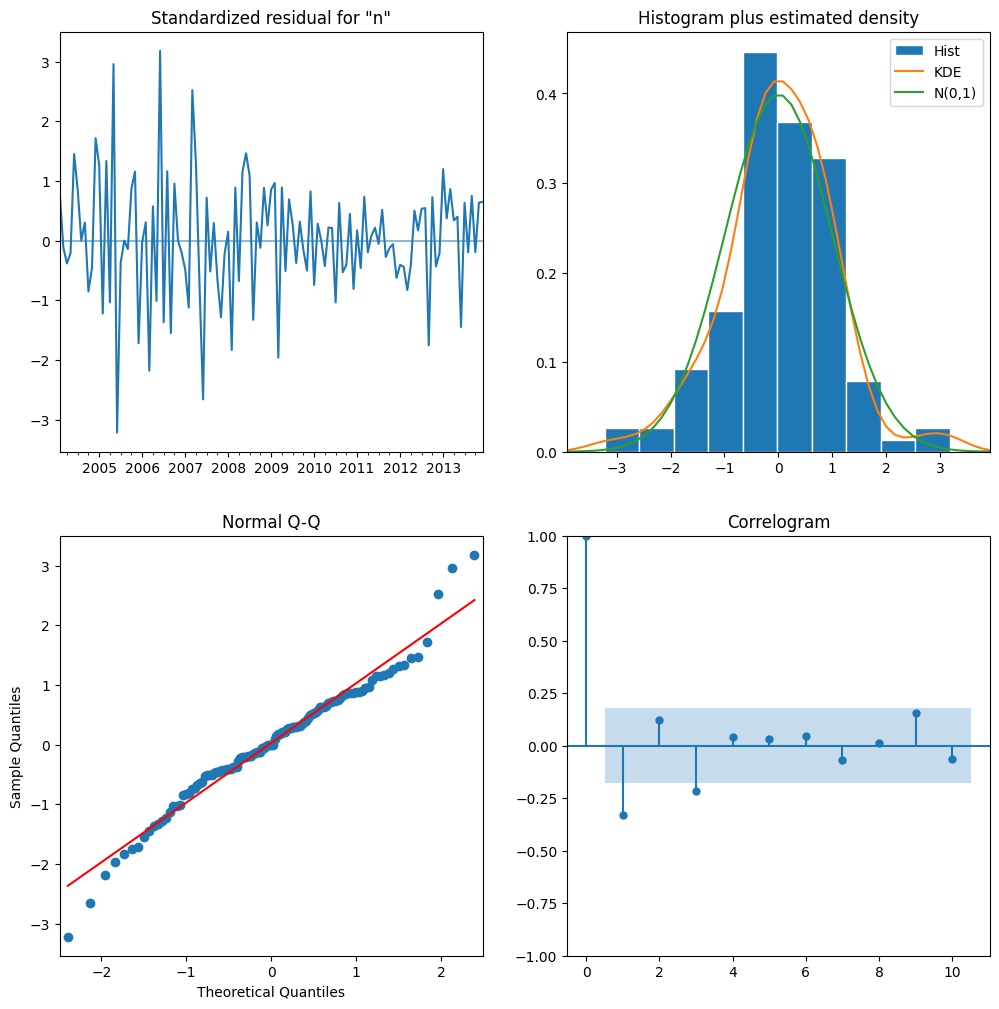

In [52]:
model_fit.plot_diagnostics(figsize=(12,12))
plt.show()

In [53]:
model_performance_summary.append({"Method":"Manual",
                                  "Model":"SARIMA"+str(model_fit.model.order)+str(model_fit.model.seasonal_order),
                                  "MAE":mean_absolute_error(df_test["number_sold"], df_test["forecast_manual_SARIMA"]),
                                  "MAPE": mean_absolute_percentage_error(df_test["number_sold"], df_test["forecast_manual_SARIMA"]),
                                  "MSE":mean_squared_error(df_test["number_sold"], df_test["forecast_manual_SARIMA"]),
                                  "R2": r2_score(df_test["number_sold"], df_test["forecast_manual_SARIMA"]),
                                  "AIC": model_fit.aic})

### Facebook Prophet
<p> Facebook Prophet is an open-source algorithm developed by Facebook's Core Data Science team. It's designed for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well <a href="https://facebook.github.io/prophet/docs/quick_start.html#python-api">(reference here)</a>.

<p> Interpretation of the line plot
    <ul>
        <li> The black dots represent the actual values of the truck sales over time. The blue line is the predicted values (yhat) of the time series from the Prophet model. It represents the model's best guess for future values based on the underlying trends and patterns it has learned from the historical data.
        <li> The light blue shaded area shows the uncertainty intervals of the predictions (yhat_lower and yhat_upper). These bounds represent the range within which the true future values are expected to fall with a certain probability. The wider the shaded area, the higher the uncertainty about the prediction.
        <li> The forecast seems to align reasonably well with the historical data, which suggests that the model could be a good fit for this particular time series. 
    </ul>
<p> Interpretation of the trend and seasonality plot:
    <ul>
        <li> Trend: The plot shows a clear upward trajectory from 2003 to 2014. This suggests that there's a long-term increase in truck sales. It means that, independent of other factors like seasonality and holidays, the underlying sales is growing over time.
        <li> Yearly Seasonality: The shows the seasonal pattern that repeats annually. This plot demonstrates how the sales fluctuates throughout the year. For example, sales peaks in July or August and drops in December and January each year. This could be due to various factors like holidays, weather changes, or industry cycles.
    </ul>
<p> Evaluation measures:
    <ul>
        <li> MAE (Mean Absolute Error): The average absolute difference between the forecasted values and the actual values. An MAE of 63.61 suggests that on average, the model's predictions are about 63.61 units away from the actual values.
        <li> MAPE (Mean Absolute Percentage Error): This gives the average absolute percent difference between the forecast and the actual values. A MAPE of 8.15% means that the model's predictions are, on average, off by 8.15% from the actual values. A MAPE of 8.15% might be very acceptable
        <li> MSE (Mean Squared Error): The average of the squares of the differences between the forecasted and actual values. MSE is 6585.82, which is quite high.
        <li> R2 (R-squared): This is the coefficient of determination. An R2 of 0.63786 indicates that the model can explain approximately 63.79% of the data. This would be considered a good fit.
        <li> In summary, the model has some predictive power with an R2 of around 0.64, meaning it is relatively decent at explaining the variation in the data. However, the errors indicated by MAE and MSE show that there is still significant room for improvement.
    </ul>

In [54]:
df=df.reset_index().rename(columns={"month":"ds","number_sold":"y"})
df

,ds,y
0,2003-01-01,155
1,2003-02-01,173
2,2003-03-01,204
3,2003-04-01,219
4,2003-05-01,223
...,...,...
139,2014-08-01,933
140,2014-09-01,704
141,2014-10-01,639
142,2014-11-01,571


In [55]:
m = Prophet()
m.fit(df[:-12])

12:53:40 - cmdstanpy - INFO - Chain [1] start processing
12:53:40 - cmdstanpy - INFO - Chain [1] done processing


In [56]:
df[:-12]

,ds,y
0,2003-01-01,155
1,2003-02-01,173
2,2003-03-01,204
3,2003-04-01,219
4,2003-05-01,223
...,...,...
127,2013-08-01,861
128,2013-09-01,641
129,2013-10-01,564
130,2013-11-01,529


In [57]:
future = m.make_future_dataframe(periods=12, freq='M')
future.tail(20)

,ds
124,2013-05-01
125,2013-06-01
126,2013-07-01
127,2013-08-01
128,2013-09-01
129,2013-10-01
130,2013-11-01
131,2013-12-01
132,2013-12-31
133,2014-01-31


In [58]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2003-01-01,96.101257,54.328176,140.210667
1,2003-02-01,103.606393,56.430441,144.711994
2,2003-03-01,183.343935,136.590871,224.025011
3,2003-04-01,213.584750,169.795699,256.290128
4,2003-05-01,252.563941,209.244536,297.739519
...,...,...,...,...
139,2014-07-31,792.593034,750.058521,840.997966
140,2014-08-31,713.009188,672.845922,760.394552
141,2014-09-30,669.078640,625.090831,709.639049
142,2014-10-31,645.823125,603.856357,687.041129


In [59]:
df[-12:]

,ds,y
132,2014-01-01,578
133,2014-02-01,572
134,2014-03-01,646
135,2014-04-01,781
136,2014-05-01,872
137,2014-06-01,824
138,2014-07-01,958
139,2014-08-01,933
140,2014-09-01,704
141,2014-10-01,639


In [60]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python39\lib\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [61]:
plot_components_plotly(m, forecast)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python39\lib\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [62]:
forecast[-12:]['yhat']

132    600.995474
133    599.098947
134    713.108589
135    749.499835
136    776.126864
137    755.957862
138    779.598262
139    792.593034
140    713.009188
141    669.078640
142    645.823125
143    683.993827
Name: yhat, dtype: float64

In [63]:
print("MAE:",mean_absolute_error(df[-12:]['y'], forecast[-12:]['yhat']))
print("MAPE:",mean_absolute_percentage_error(df[-12:]['y'], forecast[-12:]['yhat']))
print("MSE:",mean_squared_error(df[-12:]['y'], forecast[-12:]['yhat']))
print("R2:",r2_score(df[-12:]['y'], forecast[-12:]['yhat']))

MAE: 63.610994451095166
MAPE: 0.08154469590162501
MSE: 6585.818565791131
R2: 0.6378610577668877


In [64]:
df_test["forecast_prophet"] = forecast[-12:]['yhat'].values

In [65]:
df_test

,number_sold,forecast_manual_ARIMA,forecast_manual_SARIMA,forecast_prophet
month,,,,
2014-01-01,578,624.0,599.953756,600.995474
2014-02-01,572,624.0,602.358380,599.098947
2014-03-01,646,624.0,751.445085,713.108589
2014-04-01,781,624.0,806.751443,749.499835
2014-05-01,872,624.0,934.196530,776.126864
2014-06-01,824,624.0,874.080923,755.957862
2014-07-01,958,624.0,1014.751443,779.598262
2014-08-01,933,624.0,1035.190749,792.593034
2014-09-01,704,624.0,770.682079,713.009188


In [66]:
model_performance_summary.append({"Method":"Manual",
                                  "Model":"Prophet",
                                  "R2": r2_score(df[-12:]['y'], forecast[-12:]['yhat'])})

### Auto ARIMA
<p> Evaluation measures:
    <ul>
        <li> MAE (Mean Absolute Error): The average absolute error is about 140.09 units.
        <li> MAPE (Mean Absolute Percentage Error): The MAPE of 17.32% indicates, on average, the forecast is off by about 17.32% from the actual values.
        <li> MSE (Mean Squared Error): The large MSE suggests that there are large errors in some predictions, which could be due to periods of high volatility that the model is not capturing well.
        <li> R2 (R-squared): An R2 value of -0.76 indicates that the model is not able to explain the variance in the observed data. Negative R2 values suggest the model fits worse than a horizontal line at the mean of the observed values.
        <li> Considering these measures, it seems that the ARIMA(4,0,4) model is not adequate for capturing the dynamics of the time series. The negative R2 value, in particular, suggests the model is not capturing the structure of the time series effectively.
    </ul>
<p> Residual diagnostics:
    <ul>
        <li> Standardized Residual Plot shows the standardized residuals over time. The residuals seem quite volatile but don't show an obvious pattern or trend, which is a good sign.
        <li> Histogram plus Estimated Density: The residuals seem fairly normally distributed, but with some deviation from normality, especially in the tails.
        <li> Normal Q-Q Plot: The residuals generally follow the line, which suggests that the residuals are normally distributed, although there are some deviations in the tails.
        <li> Correlogram: There are a few spikes that extend beyond the blue area, indicating that there may still be some autocorrelation not captured by the model.
    </ul>
<p> Based on these findings, it seems the ARIMA(4, 0, 4) model residuals do not exhibit clear patterns and are mostly random, which suggests the model has captured a significant part of the time series structure. However, the slight deviations from normality in the tails and the few autocorrelations in the correlogram suggest there might be room for improvement.

In [67]:
stepwise_fit = auto_arima(df_train["number_sold_log"], start_p=0, start_q=0, 
                          test="adf", 
                          max_p=12, max_d = 3, max_q=12,
                          m=1,
                          d=None,
                          seasonal=False,
                          start_P=0,
                          D=0,
                          trace=True,
                          error_action='ignore',
                          suppress_warnings=True, 
                          stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=846.176, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.08 sec


 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-153.469, Time=0.12 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.16 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-151.477, Time=0.15 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.10 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.10 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-153.167, Time=0.21 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-158.889, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=9.169, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-158.045, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-156.926, Time=0.19 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-156.942, Time=0.21 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=153.294, Time=0.04 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-74.414, Time=0.12 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-158.915, Time=0.11 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-156.930, Time=0.15 sec
 ARIMA(3,0,1)(0,0,0)[0] interc

In [68]:
model=ARIMA(df_train["number_sold_log"],order=stepwise_fit.get_params()["order"])
model_fit=model.fit()
print(model_fit.summary())

c:\Users\LENOVO\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

c:\Users\LENOVO\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

c:\Users\LENOVO\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



                               SARIMAX Results                                
Dep. Variable:        number_sold_log   No. Observations:                  132
Model:                 ARIMA(4, 0, 4)   Log Likelihood                 101.473
Date:                Thu, 04 Apr 2024   AIC                           -182.947
Time:                        12:53:50   BIC                           -154.119
Sample:                    01-01-2003   HQIC                          -171.232
                         - 12-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.8401      0.487     11.990      0.000       4.885       6.795
ar.L1          0.4758      0.222      2.140      0.032       0.040       0.912
ar.L2          0.3434      0.175      1.966      0.0

c:\Users\LENOVO\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [69]:
df_test['forecast_auto_ARIMA']=np.exp(model_fit.predict("2014-01-01", "2014-12-01", dynamic=True))

In [70]:
df_test

,number_sold,forecast_manual_ARIMA,forecast_manual_SARIMA,forecast_prophet,forecast_auto_ARIMA
month,,,,,
2014-01-01,578,624.0,599.953756,600.995474,668.584836
2014-02-01,572,624.0,602.358380,599.098947,624.364738
2014-03-01,646,624.0,751.445085,713.108589,626.535207
2014-04-01,781,624.0,806.751443,749.499835,617.600629
2014-05-01,872,624.0,934.196530,776.126864,616.705187
2014-06-01,824,624.0,874.080923,755.957862,615.442621
2014-07-01,958,624.0,1014.751443,779.598262,612.571749
2014-08-01,933,624.0,1035.190749,792.593034,610.955018
2014-09-01,704,624.0,770.682079,713.009188,608.979130


In [71]:
print("MAE:",mean_absolute_error(df_test["number_sold"], df_test["forecast_auto_ARIMA"]))
print("MAPE:",mean_absolute_percentage_error(df_test["number_sold"], df_test["forecast_auto_ARIMA"]))
print("MSE:",mean_squared_error(df_test["number_sold"], df_test["forecast_auto_ARIMA"]))
print("R2:",r2_score(df_test["number_sold"], df_test["forecast_auto_ARIMA"]))

MAE: 140.09636169592716
MAPE: 0.17320335622035263
MSE: 32075.059539064634
R2: -0.7637333943386002


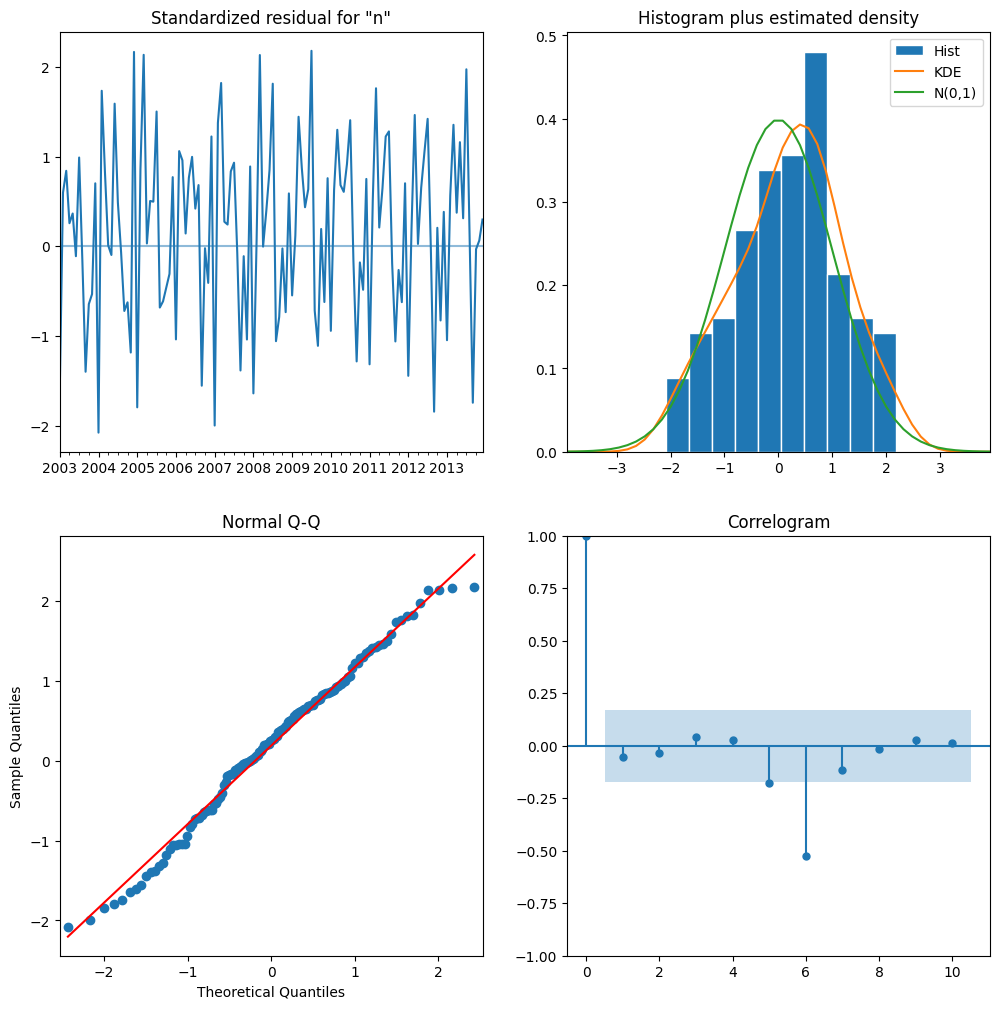

In [72]:
model_fit.plot_diagnostics(figsize=(12,12))
plt.show()

In [73]:
model_performance_summary.append({"Method":"Auto",
                                  "Model":"ARIMA"+str(stepwise_fit.get_params()["order"]),
                                  "MAE":mean_absolute_error(df_test["number_sold"], df_test["forecast_auto_ARIMA"]),
                                  "MAPE": mean_absolute_percentage_error(df_test["number_sold"], df_test["forecast_auto_ARIMA"]),
                                  "MSE":mean_squared_error(df_test["number_sold"], df_test["forecast_auto_ARIMA"]),
                                  "R2": r2_score(df_test["number_sold"], df_test["forecast_auto_ARIMA"]),
                                  "AIC": model_fit.aic})

### Auto SARIMA
<p> Evaluation measures:
    <ul>
        <li> MAE (Mean Absolute Error): is around 20.14, which indicates that, on average, the model's forecasts are about 20.14 units off from the actual sales numbers.
        <li> MAPE (Mean Absolute Percentage Error): A MAPE of approximately 2.90% suggests that the model's forecasts are, on average, 2.90% away from the actual values. This is generally considered a very good level of accuracy.
        <li> MSE (Mean Squared Error): The MSE is roughly 794.19, which indicates the typical square error the model predictions have. Squaring the errors gives more weight to larger errors.
        <li> R2 (R-squared): An R-squared of 0.9563 means that about 95.63% of the variance in the truck sales numbers is explained by the SARIMA model. This is an excellent result, showing a very high level of explanatory power.
        <li> Based on the R-squared value, the SARIMA model appears to perform extremely well for your dataset. The MAE and MAPE are low, indicating good accuracy of the forecasts. The MSE is relatively low as well, which means the model is not making many large errors in its predictions.
    </ul>
<p> Residual diagnostics:
    <ul>
        <li> Standardized Residual Plot shows that the residuals don't seem to exhibit any obvious patterns or structure, which suggests that the model is appropriate for the data.
        <li> Histogram plus Estimated Density: the histogram and the KDE line are similar in shape to the normal distribution indicates that the residuals are well-modeled. In this case, the residuals seem to follow the normal distribution reasonably well, which is a good sign.
        <li> Normal Q-Q Plot: There are some deviations at the ends, but the dots follow the line quite closely, which indicates that the normality assumption is not severely violated.
        <li> Correlogram: shows that all autocorrelations are within the confidence band, suggesting that there's no significant autocorrelation left in the residuals.
    </ul>
<p> These diagnostic plots indicate that this model has done a good job in modeling the time series. The residuals appear to be random (no patterns in the residuals plot), normally distributed (as shown in the histogram and Q-Q plot), and there is no significant autocorrelation remaining in the residuals (as indicated by the correlogram). This suggests that the model's assumptions are not violated and that the model fits the data well.

In [74]:
stepwise_fit = auto_arima(df_train["number_sold_log"], 
                          start_p=0, d=None, start_q=0, 
                          test="adf", 
                          max_p=12, max_d=3, max_q=12,
                          m=12,
                          seasonal=True,
                          start_P=0, D=None, start_Q=0,
                          max_P=12, max_D=3, max_Q=12,
                          trace=True,
                          error_action='ignore',
                          suppress_warnings=True, 
                          stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-398.612, Time=0.09 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-434.288, Time=0.23 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=-441.245, Time=0.32 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=-410.448, Time=0.09 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=-439.443, Time=0.53 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=-439.469, Time=1.06 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=-435.022, Time=0.20 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=-437.425, Time=1.47 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=-429.442, Time=0.20 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=-439.360, Time=0.72 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=-439.265, Time=0.62 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=-440.943, Time=0.28 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=-437.492, Time=1.12 sec
 ARIMA(0,1,1)(0,1,1)[12] intercept   : AIC=-439.214, Time=0.45 sec

Best model:  ARIMA

In [75]:
model=SARIMAX(df_train["number_sold_log"],order=stepwise_fit.get_params()["order"],seasonal_order=stepwise_fit.get_params()["seasonal_order"])
model_fit=model.fit() 
print(model_fit.summary())

c:\Users\LENOVO\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

c:\Users\LENOVO\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



                                     SARIMAX Results                                      
Dep. Variable:                    number_sold_log   No. Observations:                  132
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                 223.622
Date:                            Thu, 04 Apr 2024   AIC                           -441.245
Time:                                    12:53:59   BIC                           -432.907
Sample:                                01-01-2003   HQIC                          -437.859
                                     - 12-01-2013                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3571      0.080     -4.463      0.000      -0.514      -0.200
ma.S.L12      -0.5563      0.094   

In [76]:
df_test['forecast_auto_SARIMA']=np.exp(model_fit.predict("2014-01-01", "2014-12-01", dynamic=True))

In [77]:
df_test

,number_sold,forecast_manual_ARIMA,forecast_manual_SARIMA,forecast_prophet,forecast_auto_ARIMA,forecast_auto_SARIMA
month,,,,,,
2014-01-01,578,624.0,599.953756,600.995474,668.584836,581.388160
2014-02-01,572,624.0,602.358380,599.098947,624.364738,583.761057
2014-03-01,646,624.0,751.445085,713.108589,626.535207,718.485216
2014-04-01,781,624.0,806.751443,749.499835,617.600629,770.027800
2014-05-01,872,624.0,934.196530,776.126864,616.705187,875.237113
2014-06-01,824,624.0,874.080923,755.957862,615.442621,842.856377
2014-07-01,958,624.0,1014.751443,779.598262,612.571749,958.654182
2014-08-01,933,624.0,1035.190749,792.593034,610.955018,971.275800
2014-09-01,704,624.0,770.682079,713.009188,608.979130,729.834499


In [78]:
print("MAE:",mean_absolute_error(df_test["number_sold"], df_test["forecast_auto_SARIMA"]))
print("MAPE:",mean_absolute_percentage_error(df_test["number_sold"], df_test["forecast_auto_SARIMA"]))
print("MSE:",mean_squared_error(df_test["number_sold"], df_test["forecast_auto_SARIMA"]))
print("R2:",r2_score(df_test["number_sold"], df_test["forecast_auto_SARIMA"]))

MAE: 20.139720828726855
MAPE: 0.029009642078918197
MSE: 794.1861794298269
R2: 0.9563295374626942


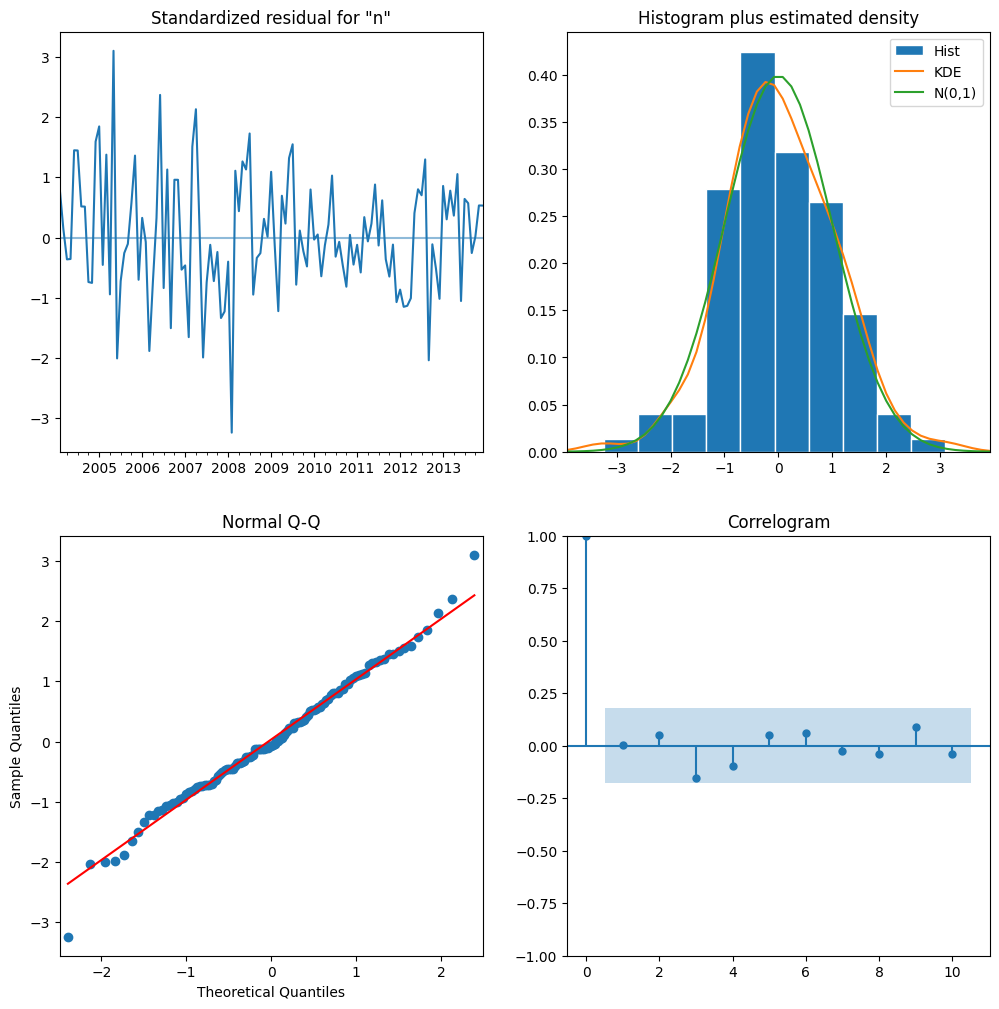

In [79]:
model_fit.plot_diagnostics(figsize=(12,12))
plt.show()

In [80]:
model_performance_summary.append({"Method":"Auto",
                                  "Model":"SARIMA"+str(stepwise_fit.get_params()["order"])+str(stepwise_fit.get_params()["seasonal_order"]),
                                  "MAE":mean_absolute_error(df_test["number_sold"], df_test["forecast_auto_SARIMA"]),
                                  "MAPE": mean_absolute_percentage_error(df_test["number_sold"], df_test["forecast_auto_SARIMA"]),
                                  "MSE":mean_squared_error(df_test["number_sold"], df_test["forecast_auto_SARIMA"]),
                                  "R2": r2_score(df_test["number_sold"], df_test["forecast_auto_SARIMA"]),
                                  "AIC": model_fit.aic})

## Compare models' performance

<p> Models' performance comparision:
    <ul>
        <li> Manual ARIMA(0, 1, 0): This simple model has not performed well. It has the highest MAE and a negative R2, indicating that it is worse than a naive model that would just predict the average sales every month. The high MAE and MSE suggest it is quite far off from actual values. Its AIC (Akaike Information Criterion) is also relatively high, which indicates a poorer model fit.
        <li> Manual SARIMA(0, 1, 0)(0, 1, 0, 12): This model has improved significantly over the simple ARIMA model. The MAE and MAPE are lower, and the R2 has improved to 0.768, suggesting that about 76.8% of the variability in the data is explained by this model. The AIC is much lower than the ARIMA model, indicating a better fit.
        <li> Manual Prophet: The Prophet model's R2 is lower than the manual SARIMA model but higher than the manual ARIMA. It seems to be missing MAE, MAPE, and MSE values, but given the R2, it's likely that it performs reasonably well, though not as well as the manual SARIMA. This maybe because Prophet works better on additive time series rather than multiplicative like this dataset.
        <li> Auto ARIMA(4, 0, 4): This automatically selected ARIMA model has not performed well either. It has even higher errors (MAE, MSE) and a worse R2 score than the manual ARIMA model, which implies that the additional complexity did not translate into better performance.
        <li> Auto SARIMA(0, 1, 1)(0, 1, 1, 12): This automatically selected SARIMA model outperforms all others with the lowest MAE, MAPE, and MSE, and a very high R2 value of 0.956, indicating excellent model performance. It explains 95.6% of the variance in the truck sales data. The AIC is the lowest, indicating the best model fit among those compared.
    </ul>
<p> In the visualization, the lines represent each model's predicted values compared to the actual sales (blue line). The closer a model's line is to the actual line, the more accurate its predictions. Based on our results, the Auto SARIMA(0, 1, 1)(0, 1, 1, 12) is closest to the actual values, aligning with its superior statistical metrics. The graph shows that while some models captured the general trend, they varied in capturing the amplitude and the seasonal peaks and drops of the sales data.
<p> In conclusion, the Auto SARIMA(0, 1, 1)(0, 1, 1, 12) model is the best fit for our data according to both the statistical metrics and the visual analysis. It has the lowest error metrics and the highest R2 value, which means its predicted values are closest to the actual sales numbers.

In [81]:
model_performance_summary_df = pd.DataFrame(model_performance_summary)
model_performance_summary_df

,Method,Model,MAE,MAPE,MSE,R2,AIC
0,Manual,"ARIMA(0, 1, 0)",129.833333,0.158793,29141.000000,-0.602396,-161.652677
1,Manual,"SARIMA(0, 1, 0)(0, 1, 0, 12)",59.148360,0.082034,4210.505061,0.768474,-398.612106
2,Manual,Prophet,NaN,NaN,NaN,0.637861,NaN
3,Auto,"ARIMA(4, 0, 4)",140.096362,0.173203,32075.059539,-0.763733,-182.946629
4,Auto,"SARIMA(0, 1, 1)(0, 1, 1, 12)",20.139721,0.029010,794.186179,0.956330,-441.244785


In [82]:
df_test

,number_sold,forecast_manual_ARIMA,forecast_manual_SARIMA,forecast_prophet,forecast_auto_ARIMA,forecast_auto_SARIMA
month,,,,,,
2014-01-01,578,624.0,599.953756,600.995474,668.584836,581.388160
2014-02-01,572,624.0,602.358380,599.098947,624.364738,583.761057
2014-03-01,646,624.0,751.445085,713.108589,626.535207,718.485216
2014-04-01,781,624.0,806.751443,749.499835,617.600629,770.027800
2014-05-01,872,624.0,934.196530,776.126864,616.705187,875.237113
2014-06-01,824,624.0,874.080923,755.957862,615.442621,842.856377
2014-07-01,958,624.0,1014.751443,779.598262,612.571749,958.654182
2014-08-01,933,624.0,1035.190749,792.593034,610.955018,971.275800
2014-09-01,704,624.0,770.682079,713.009188,608.979130,729.834499


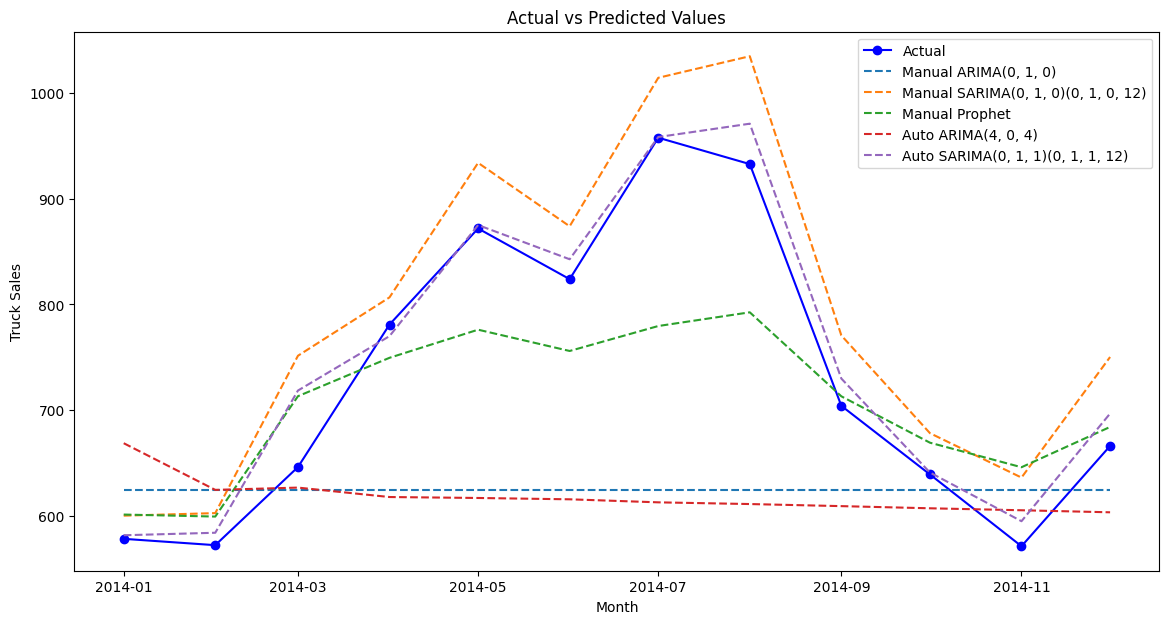

In [83]:
plt.figure(figsize=(14, 7))

plt.plot(df_test.index, df_test["number_sold"], label='Actual', color='blue', marker='o')

for i in model_performance_summary_df.index:
    plt.plot(df_test.index, 
             df_test[df_test.columns[i+1]], 
             label=model_performance_summary_df["Method"][i]+" "+model_performance_summary_df["Model"][i], 
             linestyle='--')

plt.title('Actual vs Predicted Values')
plt.xlabel('Month')
plt.ylabel('Truck Sales')
plt.legend()
#plt.grid(True)
plt.show()

## Evaluate model performance with Time Series Cross Validation

<p> The purpose of time series cross-validation is to evaluate the performance of a model in predicting future values based on past observations. This is crucial for time series analysis because time series data are inherently sequential, and traditional random cross-validation could disrupt the temporal order, leading to unrealistic assessments. Time series cross-validation maintains the temporal ordering by using a rolling or expanding window approach to simulate a real-world scenario where only past data is used to predict future values. By doing so, it provides several benefits <a href="https://medium.com/@soumyachess1496/cross-validation-in-time-series-566ae4981ce4">(reference here)</a>:
    <ul>
        <li> It assesses the model’s ability to predict new, unseen data, which is the ultimate test of its performance.
        <li> It helps to prevent overfitting by testing the model on different segments of the data.
        <li> It gives insights into the model's stability over time. A model that performs well across multiple folds is more likely to perform well on actual future data.
    </ul>
<p> The results from the time series cross-validation suggest that the SARIMA(0,1,1)(0,1,1,12) model generally performs well on the given data.
    <ul>
        <li> Mean Absolute Error (MAE): On the actual scale, the MAE values range from 21.70 to 61.17, with an average of 34.79. These values are higher than the MAE obtained from the single split (20.14), indicating that when the model is trained on different subsets of the data, it exhibits a larger average error in its predictions.
        <li> Mean Absolute Percentage Error (MAPE): The MAPE values range from 5.81% to 8.58%, averaging at 7.24%. This shows that on average, the model's predictions can be off by around 7.24% from the actual values, which is higher than the single split MAPE of 2.90%.
        <li> Mean Squared Error (MSE): The MSE values are significantly higher than those from the single split (794.19), ranging from 691.17 to 4574.80, with an average MSE of 1911.75. This suggests that there is a greater variance in the errors when using cross-validation.
        <li> R-squared (R2): The R2 values average to 0.745, which is lower than the single split R2 of 0.956. This still indicates a relatively strong fit, as the model can explain around 74.5% of the variability in the actual data across different folds, but it's not as high as the single split result.
        <li> Akaike Information Criterion (AIC): The average AIC across the folds is -204.33, which is much higher (less negative) than the single split AIC of -441.24. It suggests that while the cross-validated model fits the data reasonably well, it does not fit as well as the model trained on the single split.
    </ul>
<p> The cross-validation results for the SARIMA(0,1,1)(0,1,1,12) model on actual-scale data indicate that while the model has a reasonably good fit with an average R2 of 0.745, there is a noticeable increase in predictive errors (MAE and MAPE) and variability in these errors (MSE) compared to the performance metrics obtained from a single split.
<p> In conclusion, while the SARIMA(0,1,1)(0,1,1,12) model demonstrates good predictive capabilities, its performance is sensitive to the specific data it is trained on. Time series cross-validation has revealed that the model's ability to generalize may not be as robust as initially indicated by the single split results. This underscores the importance of cross-validation in time series analysis to obtain a more accurate assessment of a model's predictive performance across different temporal segments of data.

In [84]:
df.columns=["Date","number_sold"]

In [85]:
fold_performance =[]
i = 1

In [86]:
data = np.log(df['number_sold']).dropna()

for train_index, test_index in TimeSeriesSplit(5).split(data):
    train, test = data.iloc[train_index], data.iloc[test_index]
    
    model = SARIMAX(train, order=(0, 1, 1), seasonal_order=(0, 1, 1, 12))
    model_fit = model.fit()
    
    predictions = model_fit.get_forecast(steps=len(test)).predicted_mean
    
    fold_performance.append({"Fold": i,
                             "MAE": mean_absolute_error(np.exp(test), np.exp(predictions)),
                             "MAPE": mean_absolute_percentage_error(np.exp(test), np.exp(predictions)),
                             "MSE": mean_squared_error(np.exp(test), np.exp(predictions)),
                             "R2": r2_score(np.exp(test), np.exp(predictions)),
                             "AIC": model_fit.aic})
    i += 1

c:\Users\LENOVO\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



c:\Users\LENOVO\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\LENOVO\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



In [87]:
fold_performance_df=pd.DataFrame(fold_performance)
fold_performance_df

,Fold,MAE,MAPE,MSE,R2,AIC
0,1,21.701611,0.073348,691.169783,0.646535,-36.082426
1,2,29.053262,0.085037,1186.800469,0.675153,-113.310342
2,3,28.636509,0.058130,1128.516156,0.846401,-191.691568
3,4,33.374239,0.059450,1977.472218,0.817251,-291.432551
4,5,61.173189,0.085818,4574.803550,0.740631,-389.111422


In [88]:
fold_performance_df[["MAE","MAPE","MSE","R2","AIC"]].mean().reset_index().rename(columns={"index":"Measure",0:"Mean"})

,Measure,Mean
0,MAE,34.787762
1,MAPE,0.072357
2,MSE,1911.752435
3,R2,0.745194
4,AIC,-204.325662
